**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

<a id="Jupyter"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            I. Jupyter Notebook General Settings:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            A. Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#to perform K-means Clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# To perform Hierarchy Clusters
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

%matplotlib inline

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            B. Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            C. Adjust Jupyer Settings for Better Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.options.display.float_format='{:.2f}'.format
# Whether to print out the full DataFrame repr for wide DataFrames across multiple lines, max_columns is still respected, but the output will wrap-around across multiple “pages” if it’s width exceeds display.width. [default: True] 

<a id="data"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            2. Problem Statement - Principal Component Analysis - Indian Census Data
            </span>   
        </font>    
</h2>

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household.  


The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. 

The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on 
Area,  
Total Number of Households,  
Total Population,  
Scheduled Castes,   
Scheduled Tribes Population,   
Population in the age group 0-6,   
Literates,   


Main Workers and Marginal Workers classified by the four broad industrial categories, namely,  
(i) Cultivators,   
(ii) Agricultural Laborers,   
(iii) Household Industry Workers, and  
(iv) Other Workers and also Non-Workers.

The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. 

Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

Note: The 24 variables given in the Rubric is just for performing EDA. You will have to consider the entire dataset, including all the variables for performing PCA.

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.1 Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.
            </span>   
        </font>    
</h3>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.1 (A) Importing the Data Dictionary of Provided Dataset
            </span>   
        </font>    
</h3>

In [72]:
df_census_dict = pd.read_excel('PCAIndiaDataCensus.xlsx',sheet_name='dictionary')
df_census_dict

,Name,Description
0,State,State Code
1,District,District Code
2,Name,Name
3,TRU1,Area Name
4,No_HH,No of Household
5,TOT_M,Total population Male
6,TOT_F,Total population Female
7,M_06,Population in the age group 0-6 Male
8,F_06,Population in the age group 0-6 Female
9,M_SC,Scheduled Castes population Male


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.1 (B) Importing the Data of Provided Dataset
            </span>   
        </font>    
</h3>

In [73]:
df_census_data = pd.read_excel('PCAIndiaDataCensus.xlsx',sheet_name='data')

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.2  Displaying the first 5 and last 5 records
            </span>   
        </font>    
</h3>

In [74]:
df_census_data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,18432,6723,3752,2763,1275,486,235,407,143,78,86,1792,811,3960,2477,619,580,2052,641,142,244,1147,1012,16665,26044,2810,1728,439,343,1372,389,110,198,889,798,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,15211,6982,4200,4628,1733,1098,357,442,108,538,343,2550,925,2354,2467,384,661,915,547,369,627,686,632,12603,18902,1829,1752,261,432,729,399,293,449,546,472,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,5124,2775,4800,1940,2923,519,1205,36,71,19,55,1366,1592,835,1877,360,1250,44,157,15,32,416,438,3771,6164,721,1689,316,1161,41,123,15,28,349,377,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942,2244,1002,1118,491,408,35,102,8,24,9,6,439,276,511,710,135,286,63,176,10,43,303,205,1782,3088,317,463,74,158,50,126,6,33,187,146,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348,16504,5717,7692,2523,2267,743,766,254,237,35,64,1491,1200,3194,5425,1327,2462,1037,1069,62,319,768,1575,14874,22289,2320,3497,862,1419,832,767,38,214,588,1097,874,1928,465,1043,205,302,24,105,180,478


In [75]:
df_census_data.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,30,0,0,6916,10184,1238,1597,3808,1328,3459,997,8,3,27,5,16,3,3408,986,349,331,1,6,3,5,2,2,343,318,4346,10453,317,284,1,6,3,5,2,2,311,271,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,4155,0,0,10292,14225,2054,7466,6458,5286,5619,4104,132,108,645,903,25,173,4817,2920,839,1182,26,30,272,515,11,87,530,550,5888,16405,684,845,23,16,234,385,7,64,420,380,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,0,1012,1750,1187,1602,362,1028,715,1031,325,534,8,8,1,1,16,38,300,487,390,497,19,9,11,14,78,165,282,309,834,1599,286,363,10,5,9,8,61,118,206,232,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,0,28,50,4206,5273,994,2739,2707,2174,2098,1666,553,225,63,28,8,7,1474,1406,609,508,108,163,69,55,4,8,428,282,2493,5838,473,336,84,119,58,34,3,4,328,179,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,0,161,264,10095,13362,1882,4687,6345,5278,5366,4514,255,246,88,67,37,39,4986,4162,979,764,69,71,62,45,13,21,835,627,5632,12771,806,642,63,69,45,28,11,17,687,528,173,122,6,2,17,17,2,4,148,99


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.3  Checking the shape, size and information of data using dataset
            </span>   
        </font>    
</h3>

In [76]:
# Database dimension
print("Dataset dimension - usage_data                          :",df_census_data.shape)

#Database size
print("Dataset size - usage_data                               :",df_census_data.size)

Dataset dimension - usage_data                          : (640, 61)
Dataset size - usage_data                               : 39040


In [77]:
df_census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.4  Checking the null values in the dataset provided
            </span>   
        </font>    
</h3>

In [78]:
df_census_data.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


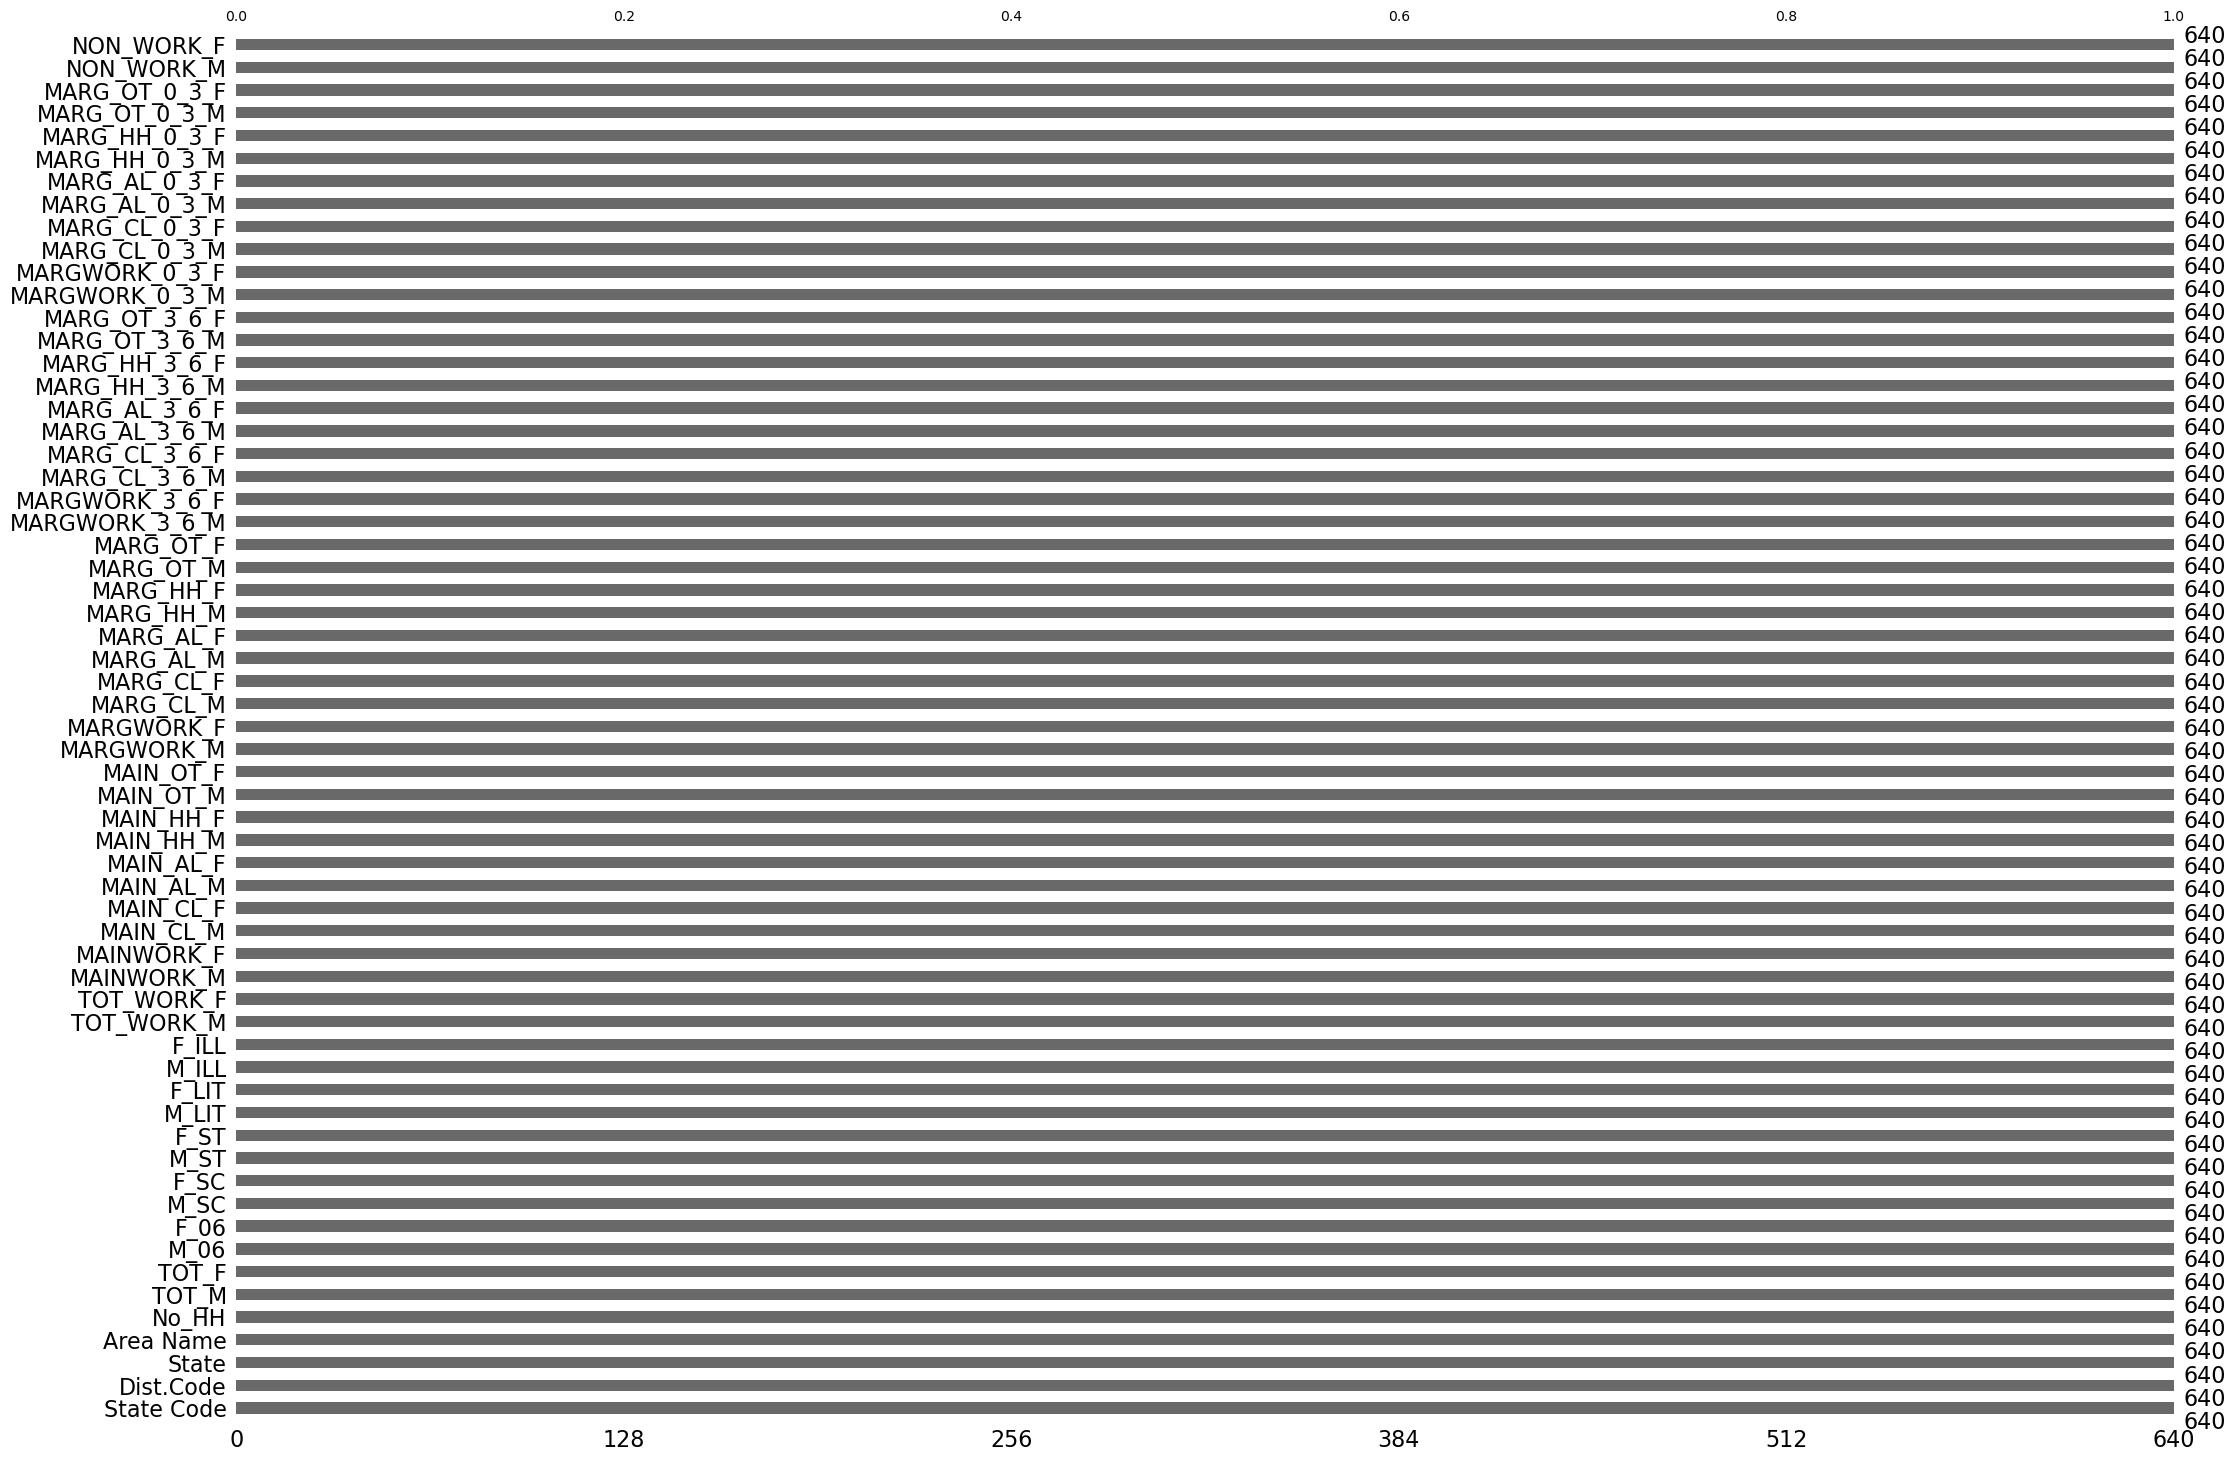

In [79]:
mn.bar(df_census_data);

#### Checking the summary of data using describe all
<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.5  Checking the null values in the dataset provided
            </span>   
        </font>    
</h3>

In [80]:
df_census_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State Code,640.00,NaN,NaN,NaN,17.11,9.43,1.00,9.00,18.00,24.00,35.00
Dist.Code,640.00,NaN,NaN,NaN,320.50,184.90,1.00,160.75,320.50,480.25,640.00
State,640,35,Uttar Pradesh,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Name,640,635,Raigarh,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_HH,640.00,NaN,NaN,NaN,51222.87,48135.41,350.00,19484.00,35837.00,68892.00,310450.00
TOT_M,640.00,NaN,NaN,NaN,79940.58,73384.51,391.00,30228.00,58339.00,107918.50,485417.00
TOT_F,640.00,NaN,NaN,NaN,122372.08,113600.72,698.00,46517.75,87724.50,164251.75,750392.00
M_06,640.00,NaN,NaN,NaN,12309.10,11500.91,56.00,4733.75,9159.00,16520.25,96223.00
F_06,640.00,NaN,NaN,NaN,11942.30,11326.29,56.00,4672.25,8663.00,15902.25,95129.00
M_SC,640.00,NaN,NaN,NaN,13820.95,14426.37,0.00,3466.25,9591.50,19429.75,103307.00


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.6  Checking the presence of duplicate records in the dataset
            </span>   
        </font>    
</h3>

In [81]:
df_census_data.duplicated().sum()

0

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>1. Total of 61 columns with 640 rows are present.
        <br>2. There are 59 Integer and 2 object columns.
        <br>3. There are no missing values in the dataset.
        <br>4. The data type of all columns seems to be correct.
        <br>5. There are no duplicated values in the dataset.
        <br>6. Dt_Customer is date column but is showing up as object.
        <br>7. Column "State Code" can be changed to categorical value as it is representing a particular state. And column State Code and State is redundant.
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.2 Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA:  No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F
            </span>   
        </font>    
</h3>

In [82]:
df_census_data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,18432,6723,3752,2763,1275,486,235,407,143,78,86,1792,811,3960,2477,619,580,2052,641,142,244,1147,1012,16665,26044,2810,1728,439,343,1372,389,110,198,889,798,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,15211,6982,4200,4628,1733,1098,357,442,108,538,343,2550,925,2354,2467,384,661,915,547,369,627,686,632,12603,18902,1829,1752,261,432,729,399,293,449,546,472,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,5124,2775,4800,1940,2923,519,1205,36,71,19,55,1366,1592,835,1877,360,1250,44,157,15,32,416,438,3771,6164,721,1689,316,1161,41,123,15,28,349,377,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942,2244,1002,1118,491,408,35,102,8,24,9,6,439,276,511,710,135,286,63,176,10,43,303,205,1782,3088,317,463,74,158,50,126,6,33,187,146,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348,16504,5717,7692,2523,2267,743,766,254,237,35,64,1491,1200,3194,5425,1327,2462,1037,1069,62,319,768,1575,14874,22289,2320,3497,862,1419,832,767,38,214,588,1097,874,1928,465,1043,205,302,24,105,180,478


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.2.1 Five Variables that we can use for Exploratory Data Analysis are - 
                <ul>
                  <font size="2.5" color = MediumBlue >
                    <li>No_HH</li>
                    <li>TOT_M</li>
                    <li>TOT_F</li>
                    <li>M_LIT</li>
                    <li>F_LIT</li>
                </ul>
                <b><b> Some question that needs to be answered using the EDA for the given datasets
                  <font size="2.5" color = MediumBlue >
                  <br>1. Which state has highest and lowest gender ratio?
                  <br>2. Which district has highest and lowest gender ratio?
                  <br>3. Which state has highest and lowest literacy rate?
                  <br>4. Which district has highest and lowest literacy rate?
                  <br>5. Which state has highest no of person per household ? Whether it has any role in the literacy rate of the state and district.
            </span>   
        </font>    
</h3>

#### Creating a new Dataframe to store and copy the fields(that are to be evaluated) with respect to States .

In [83]:
df_state_census = pd.DataFrame()
df_state_census['State'] = df_census_data['State'].sort_values().unique()
df_state_census['No_HH'] = df_census_data[['State','No_HH']].groupby('State').sum().values
df_state_census['TOT_M'] = df_census_data[['State','TOT_M']].groupby('State').sum().values
df_state_census['TOT_F'] = df_census_data[['State','TOT_F']].groupby('State').sum().values
df_state_census['M_LIT'] = df_census_data[['State','M_LIT']].groupby('State').sum().values
df_state_census['F_LIT'] = df_census_data[['State','F_LIT']].groupby('State').sum().values

In [84]:
df_district_census = df_census_data[['State','Area Name','No_HH','TOT_M','TOT_F','M_LIT','F_LIT']]

#### Calculating the Gender Ratio, Literacy Percentage and No of Person per Households to answer the questions mentioned bove 

In [85]:
df_state_census["GenderRatio"] = df_state_census['TOT_M']/df_state_census['TOT_F']
df_state_census["M_Literacy_Percentage"] = (100 * df_state_census['M_LIT'])/(df_state_census['TOT_F']+df_state_census['TOT_M'])
df_state_census["F_Literacy_Percentage"] = (100 * df_state_census['F_LIT'])/(df_state_census['TOT_F']+df_state_census['TOT_M'])
df_state_census["Total_Literacy_Percentage"] = (100 * (df_state_census['M_LIT'] + df_state_census['F_LIT']))/(df_state_census['TOT_F']+df_state_census['TOT_M'])
df_state_census["No_of_person_per_HH"] = round((df_state_census['TOT_M']+df_state_census['TOT_F'])/df_state_census['No_HH'],0)

In [86]:
df_district_census["GenderRatio"]=df_district_census["TOT_M"]/df_district_census["TOT_F"]
df_district_census["GenderRatio"] = df_district_census['TOT_M']/df_district_census['TOT_F']
df_district_census["M_Literacy_Percentage"] = (100 * df_district_census['M_LIT'])/(df_district_census['TOT_F']+df_district_census['TOT_M'])
df_district_census["F_Literacy_Percentage"] = (100 * df_district_census['F_LIT'])/(df_district_census['TOT_F']+df_district_census['TOT_M'])
df_district_census["Total_Literacy_Percentage"] = (100 * (df_district_census['M_LIT'] + df_district_census['F_LIT']))/(df_district_census['TOT_F']+df_district_census['TOT_M'])
df_district_census["No_of_person_per_HH"] = round((df_district_census['TOT_M']+df_district_census['TOT_F'])/df_district_census['No_HH'],0)

In [87]:
df_state_census.head()

,State,No_HH,TOT_M,TOT_F,M_LIT,F_LIT,GenderRatio,M_Literacy_Percentage,F_Literacy_Percentage,Total_Literacy_Percentage,No_of_person_per_HH
0,Andaman & Nicobar Island,13012,18726,28691,15488,20237,0.65,32.66,42.68,75.34,4.00
1,Andhra Pradesh,3127287,3274363,6097235,2372971,2678603,0.54,25.32,28.58,53.90,3.00
2,Arunachal Pradesh,35114,50582,88066,33965,45307,0.57,24.50,32.68,57.18,4.00
3,Assam,853374,1437268,2093432,1023294,1152979,0.69,28.98,32.66,61.64,4.00
4,Bihar,1974627,4025198,5405883,2408492,2197931,0.74,25.54,23.31,48.84,5.00


In [88]:
df_district_census.head()

,State,Area Name,No_HH,TOT_M,TOT_F,M_LIT,F_LIT,GenderRatio,M_Literacy_Percentage,F_Literacy_Percentage,Total_Literacy_Percentage,No_of_person_per_HH
0,Jammu & Kashmir,Kupwara,7707,23388,29796,13381,11364,0.78,25.16,21.37,46.53,7.00
1,Jammu & Kashmir,Badgam,6218,19585,23102,10513,7891,0.85,24.63,18.49,43.11,7.00
2,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,4534,5840,0.60,25.89,33.35,59.25,4.00
3,Jammu & Kashmir,Kargil,1320,2784,4206,1842,1962,0.66,26.35,28.07,54.42,5.00
4,Jammu & Kashmir,Punch,11654,20591,29981,13243,13477,0.69,26.19,26.65,52.84,4.00


#### 2.2.2 Which state has highest and lowest gender ratio?


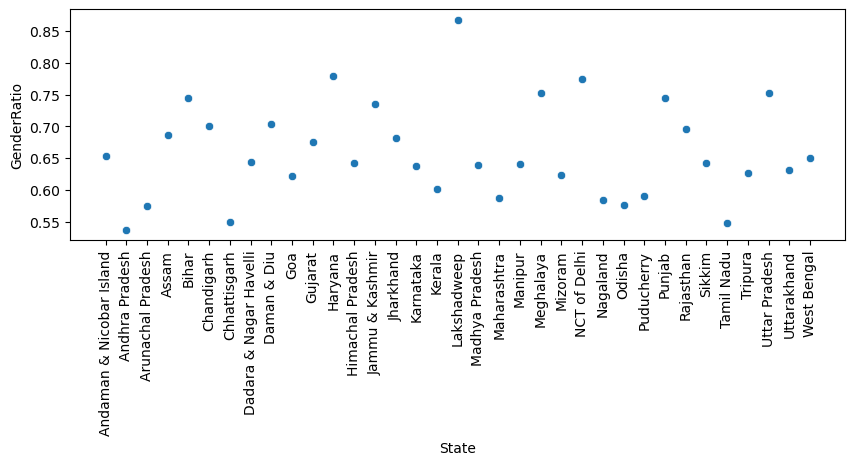

In [89]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=df_state_census['State'], y=df_state_census['GenderRatio']);
plt.xticks(rotation = 90);

#### From the above figure we can see that  Lakshdeep has highest Gender Ratio of 0.8680 and  Andhra Pradesh has the lowest Gender Ratio of 0.5370. The same can be verified from the below table

In [90]:
df_state_census[['State','GenderRatio']].sort_values(by='GenderRatio', ascending=False)

,State,GenderRatio
17,Lakshadweep,0.87
11,Haryana,0.78
23,NCT of Delhi,0.78
32,Uttar Pradesh,0.75
21,Meghalaya,0.75
4,Bihar,0.74
27,Punjab,0.74
13,Jammu & Kashmir,0.74
8,Daman & Diu,0.70
5,Chandigarh,0.70


#### 2.2.3 Which district has highest and lowest gender ratio?

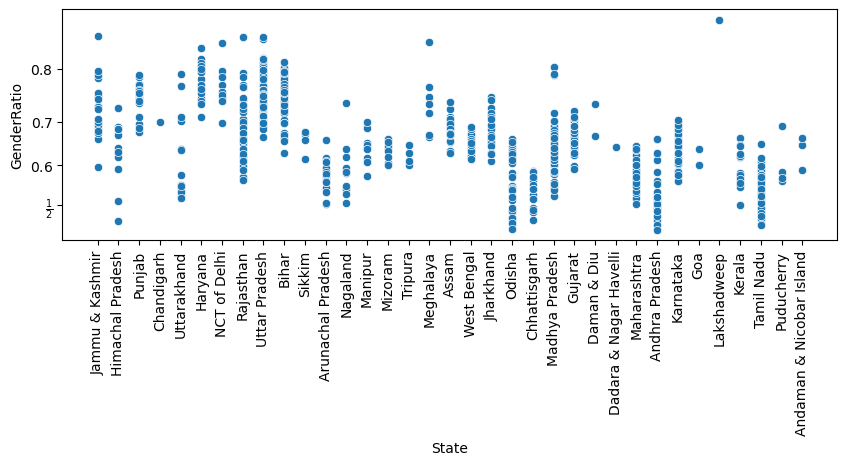

In [91]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=df_district_census['State'], y=df_district_census['GenderRatio']);
plt.yscale("logit")
plt.xticks(rotation = 90);

#### From the above figure we can see that  Lakshdeep in Lakshdeep has highest Gender Ratio of 0.8680 and  Krishan in Andhra Pradesh has the lowest Gender Ratio of 0.4379. The same can be verified from the below tables

In [92]:
df_district_census[['State','Area Name','GenderRatio']].sort_values(by='GenderRatio', ascending=True)

,State,Area Name,GenderRatio
546,Andhra Pradesh,Krishna,0.44
397,Odisha,Koraput,0.44
624,Tamil Nadu,Virudhunagar,0.45
545,Andhra Pradesh,West Godavari,0.45
390,Odisha,Baudh,0.45
...,...,...,...
138,Uttar Pradesh,Baghpat,0.84
105,Rajasthan,Dhaulpur,0.85
143,Uttar Pradesh,Mahamaya Nagar,0.85
1,Jammu & Kashmir,Badgam,0.85


#### 2.2.4 Which state has highest and lowest literacy rate?

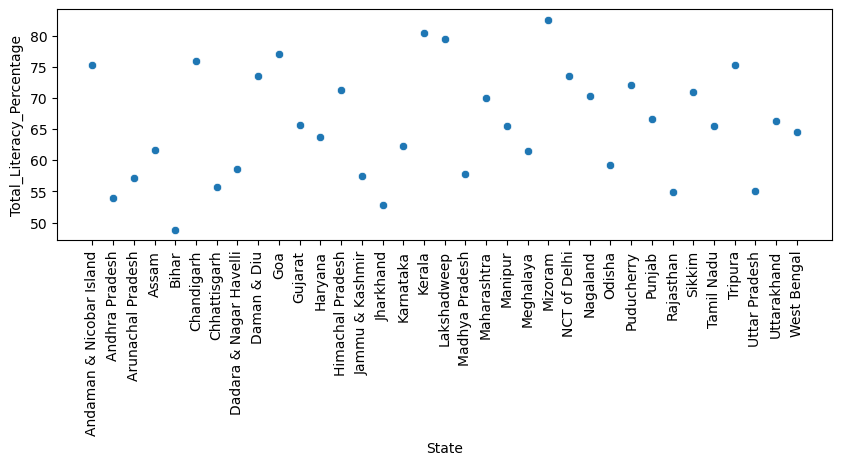

In [93]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=df_state_census['State'], y=df_state_census['Total_Literacy_Percentage']);
plt.xticks(rotation = 90);

#### From the above figure we can see that  Mizoram has highest Total Literacy Percentage of 82.53% and  Bihar has the lowest Gender Ratio of 48.84%. The same can be verified from the below tables

In [94]:
df_state_census[['State','Total_Literacy_Percentage']].sort_values(by='Total_Literacy_Percentage', ascending=False)

,State,Total_Literacy_Percentage
22,Mizoram,82.53
16,Kerala,80.35
17,Lakshadweep,79.49
9,Goa,77.05
5,Chandigarh,75.93
31,Tripura,75.36
0,Andaman & Nicobar Island,75.34
23,NCT of Delhi,73.46
8,Daman & Diu,73.45
26,Puducherry,72.07


#### 2.2.5 Which district has highest and lowest literacy rate?

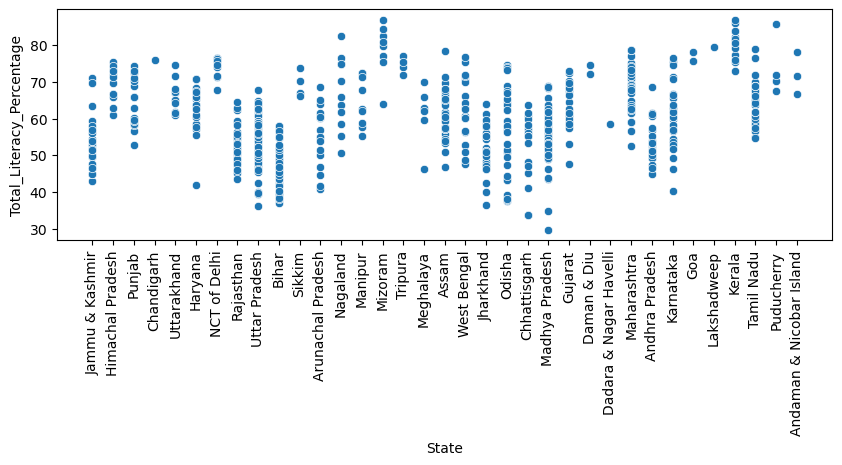

In [95]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=df_district_census['State'], y=df_district_census['Total_Literacy_Percentage']);
##plt.yscale("logit")
plt.xticks(rotation = 90);

#### From the above figure we can see that Aizwal in Mizoram has highest Literacy Percentage of 86.9518% and  Alirajpur in Madhya Pradesh has the lowest Literacy Percentage of 29.6591%. The same can be verified from the below tables

In [96]:
df_district_census[['State','Area Name','Total_Literacy_Percentage']].sort_values(by='Total_Literacy_Percentage', ascending=True)

,State,Area Name,Total_Literacy_Percentage
464,Madhya Pradesh,Alirajpur,29.66
415,Chhattisgarh,Dakshin Bastar Dantewada,33.71
416,Chhattisgarh,Bijapur,33.73
463,Madhya Pradesh,Jhabua,34.76
180,Uttar Pradesh,Shrawasti,36.16
...,...,...,...
284,Mizoram,Serchhip,84.57
635,Puducherry,Mahe,85.78
596,Kerala,Kottayam,85.97
598,Kerala,Pathanamthitta,86.88


#### 2.2.6 Which state has highest no of person per household ? Whether it has any role in the literacy rate of the state and district.

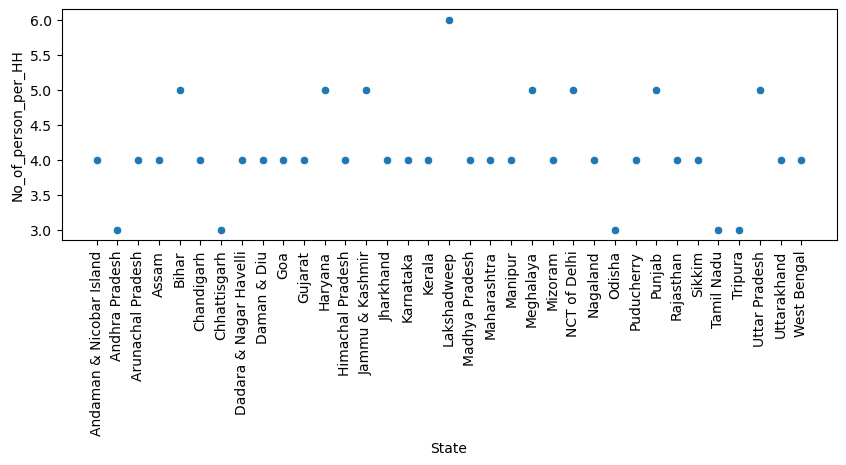

In [97]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=df_state_census['State'], y=df_state_census['No_of_person_per_HH']);
plt.xticks(rotation = 90);

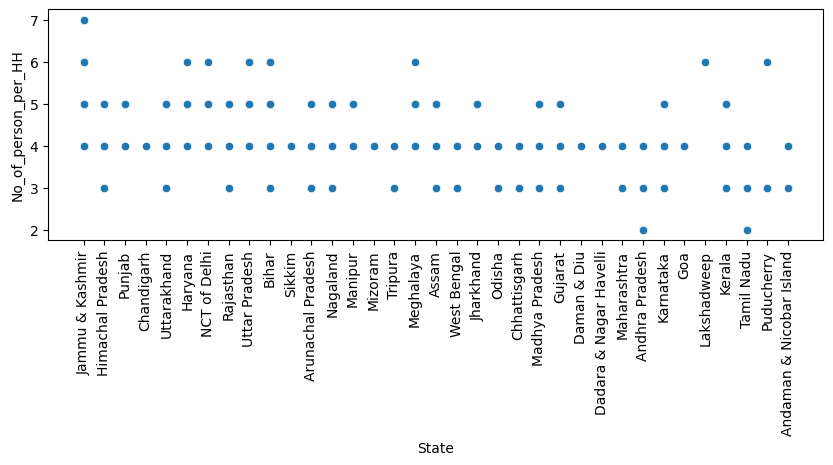

In [98]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=df_district_census['State'], y=df_district_census['No_of_person_per_HH']);
# plt.yscale("logit")
plt.xticks(rotation = 90);

#### There is difference in the number of person in an households when average is calculated at state level and when average is calculated at district level.  The average no of person seems to be slightly higher in case of district level calculation. Let us try to analyze further to understand the trend

In [99]:
df_district_census[df_district_census['No_of_person_per_HH']>=5].head(20)

,State,Area Name,No_HH,TOT_M,TOT_F,M_LIT,F_LIT,GenderRatio,M_Literacy_Percentage,F_Literacy_Percentage,Total_Literacy_Percentage,No_of_person_per_HH
0,Jammu & Kashmir,Kupwara,7707,23388,29796,13381,11364,0.78,25.16,21.37,46.53,7.00
1,Jammu & Kashmir,Badgam,6218,19585,23102,10513,7891,0.85,24.63,18.49,43.11,7.00
3,Jammu & Kashmir,Kargil,1320,2784,4206,1842,1962,0.66,26.35,28.07,54.42,5.00
7,Jammu & Kashmir,Baramula,9414,22960,30509,14692,12936,0.75,27.48,24.19,51.67,6.00
8,Jammu & Kashmir,Bandipore,3814,10319,13058,5820,4661,0.79,24.90,19.94,44.83,6.00
9,Jammu & Kashmir,Srinagar,15095,39014,52278,25837,27124,0.75,28.30,29.71,58.01,6.00
10,Jammu & Kashmir,Ganderbal,2878,7240,9887,4251,3443,0.73,24.82,20.10,44.92,6.00
11,Jammu & Kashmir,Pulwama,4596,11770,15635,7172,6552,0.75,26.17,23.91,50.08,6.00
12,Jammu & Kashmir,Shupiyan,2223,5256,7192,3227,2929,0.73,25.92,23.53,49.45,6.00
13,Jammu & Kashmir,Anantnag,8763,25412,31897,15027,13452,0.80,26.22,23.47,49.69,7.00


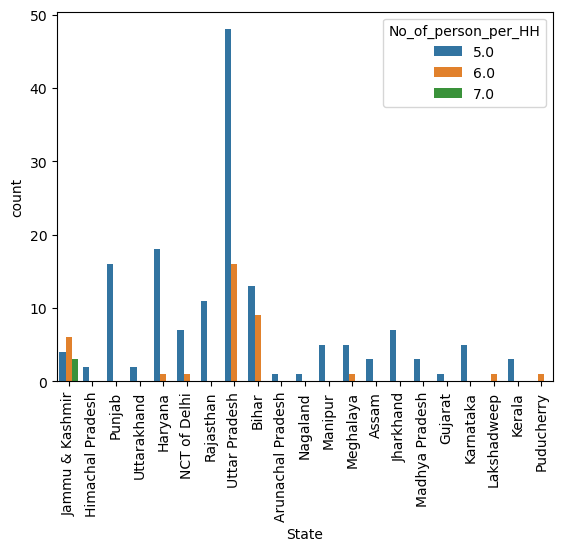

In [100]:
sns.countplot(data=df_district_census[df_district_census['No_of_person_per_HH']>=5], x='State', hue='No_of_person_per_HH');
plt.xticks(rotation = 90);

#### Punjab, Haryana, Rajsthan, Uttar Pradesh and Bihar seems to have more districts, where the average no of person in a households seems to be higher than in the other districts of other states.

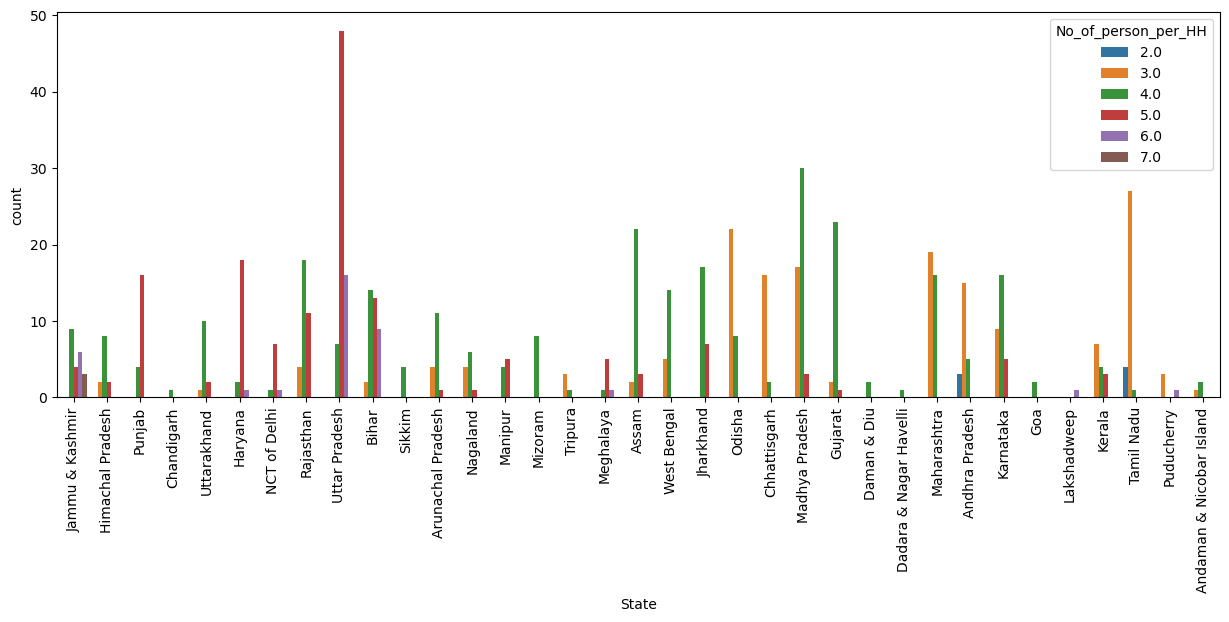

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_district_census, x='State', hue='No_of_person_per_HH');
plt.xticks(rotation = 90);

#### Let us try to figure out if there is any relation of No of person in a households with Literacy rate.

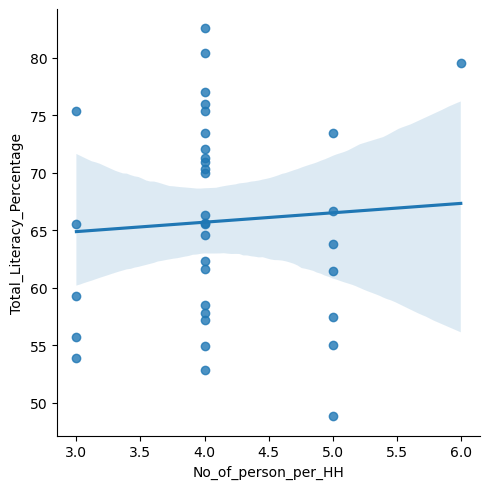

In [102]:
sns.lmplot(data=df_state_census, x='No_of_person_per_HH', y = 'Total_Literacy_Percentage');

#### No significant correlation between literacy rate and no of person per household is observed based on the lmplot shown above. Let us try to find out from the heatmap or correlation table

In [103]:
df_state_census.corr()

,No_HH,TOT_M,TOT_F,M_LIT,F_LIT,GenderRatio,M_Literacy_Percentage,F_Literacy_Percentage,Total_Literacy_Percentage,No_of_person_per_HH
No_HH,1.00,0.94,0.98,0.96,0.97,-0.19,-0.36,-0.35,-0.39,-0.15
TOT_M,0.94,1.00,0.99,0.99,0.94,0.03,-0.30,-0.40,-0.41,0.06
TOT_F,0.98,0.99,1.00,1.00,0.97,-0.07,-0.33,-0.37,-0.40,-0.03
M_LIT,0.96,0.99,1.00,1.00,0.97,-0.02,-0.29,-0.36,-0.37,0.02
F_LIT,0.97,0.94,0.97,0.97,1.00,-0.12,-0.26,-0.22,-0.26,-0.05
GenderRatio,-0.19,0.03,-0.07,-0.02,-0.12,1.00,0.52,-0.18,0.03,0.89
M_Literacy_Percentage,-0.36,-0.30,-0.33,-0.29,-0.26,0.52,1.00,0.57,0.77,0.41
F_Literacy_Percentage,-0.35,-0.40,-0.37,-0.36,-0.22,-0.18,0.57,1.00,0.96,-0.09
Total_Literacy_Percentage,-0.39,-0.41,-0.40,-0.37,-0.26,0.03,0.77,0.96,1.00,0.06
No_of_person_per_HH,-0.15,0.06,-0.03,0.02,-0.05,0.89,0.41,-0.09,0.06,1.00


In [104]:
df_district_census.corr()

,No_HH,TOT_M,TOT_F,M_LIT,F_LIT,GenderRatio,M_Literacy_Percentage,F_Literacy_Percentage,Total_Literacy_Percentage,No_of_person_per_HH
No_HH,1.00,0.92,0.97,0.93,0.93,-0.19,0.09,0.24,0.21,-0.17
TOT_M,0.92,1.00,0.98,0.99,0.93,0.10,0.19,0.15,0.18,0.13
TOT_F,0.97,0.98,1.00,0.99,0.96,-0.04,0.14,0.20,0.20,-0.00
M_LIT,0.93,0.99,0.99,1.00,0.97,0.05,0.25,0.25,0.27,0.08
F_LIT,0.93,0.93,0.96,0.97,1.00,-0.07,0.25,0.39,0.38,-0.02
GenderRatio,-0.19,0.10,-0.04,0.05,-0.07,1.00,0.40,-0.29,-0.09,0.82
M_Literacy_Percentage,0.09,0.19,0.14,0.25,0.25,0.40,1.00,0.61,0.80,0.26
F_Literacy_Percentage,0.24,0.15,0.20,0.25,0.39,-0.29,0.61,1.00,0.96,-0.24
Total_Literacy_Percentage,0.21,0.18,0.20,0.27,0.38,-0.09,0.80,0.96,1.00,-0.10
No_of_person_per_HH,-0.17,0.13,-0.00,0.08,-0.02,0.82,0.26,-0.24,-0.10,1.00


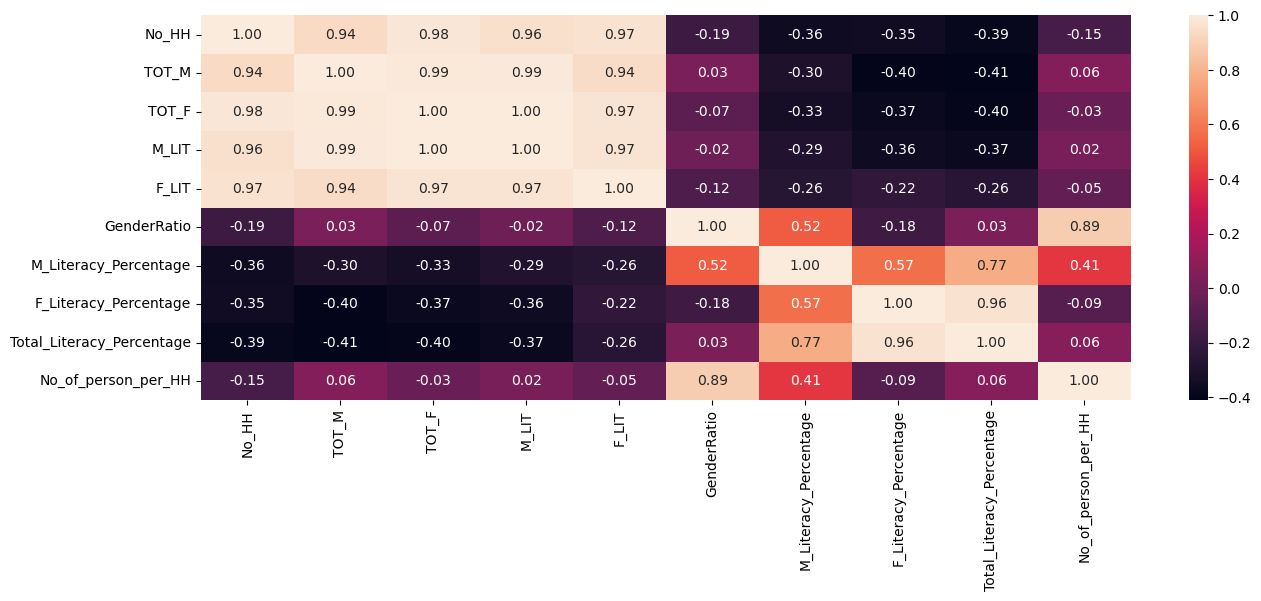

In [105]:
plt.figure(figsize=(15,5))
sns.heatmap(df_state_census.corr(), annot=True, fmt='0.2f');

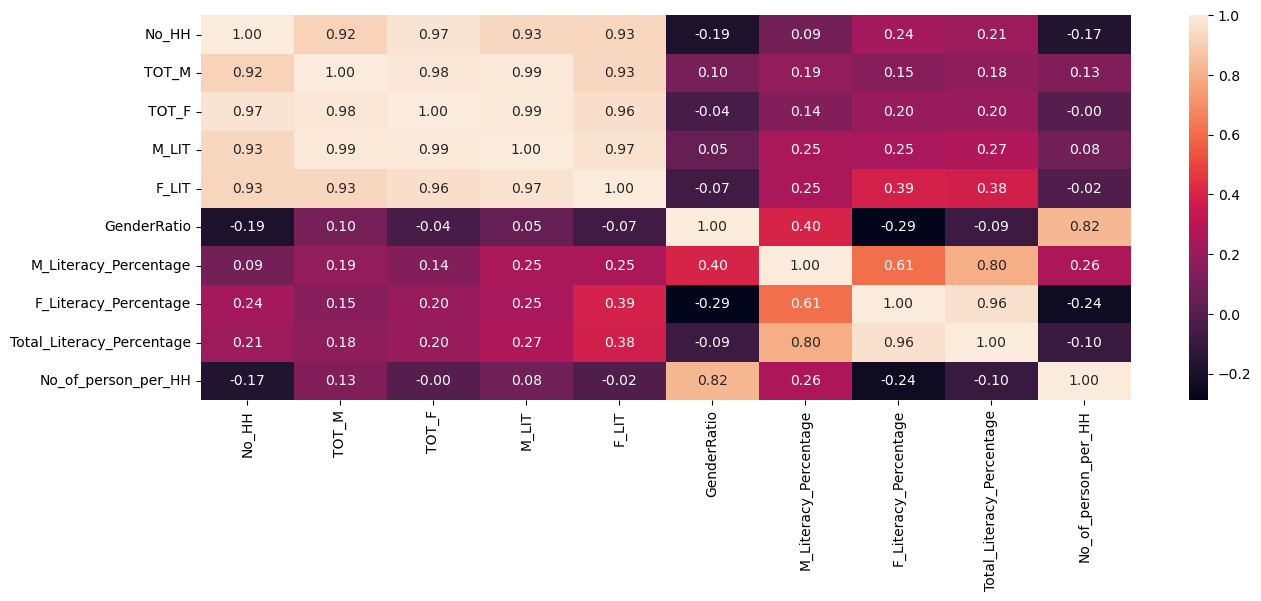

In [106]:
plt.figure(figsize=(15,5))
sns.heatmap(df_district_census.corr(), annot=True, fmt='0.2f');

#### No significant correlation between literacy rate and no of person per household is observed based on the heatmap shown above. Yes, we could observe strong correlation between no of person per household and gender ratio.

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>Lakshdeep has highest Gender Ratio of 0.8680 and Andhra Pradesh has the lowest Gender Ratio of 0.5370. The same can be verified from the below table</li>
            <li>Lakshdeep in Lakshdeep has highest Gender Ratio of 0.8680 and Krishan in Andhra Pradesh has the lowest Gender Ratio of 0.4379</li>
            <li>Mizoram has highest Total Literacy Percentage of 82.53% and Bihar has the lowest Gender Ratio of 48.84%</li>
            <li>Aizwal in Mizoram has highest Literacy Percentage of 86.9518% and Alirajpur in Madhya Pradesh has the lowest Literacy Percentage of 29.6591%</li>
            <li>Jammu Kashmir has highest no of person per household. It is 7. </li>
            <ul> 
                <li>Punjab, Haryana, Rajsthan, Uttar Pradesh and Bihar seems to have more districts, where the average no of person in a households seems to be higher than in the other districts of other states.</li>
                <li>No significant correlation between literacy rate and no of person per household is observed.</li>
                <li>But, we could observe strong correlation between no of person per household and gender ratio.</li>
            </ul>
        </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.3 We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br> We shouldn't treate outliers in this case. The reason is that all the values seems to be real census data and these data can't be assumed to have any specific pattern. Moreover, treating outlier with any values, such as median or mean, may not give us the accurate or proper insights that we could infer from the original data.
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.4 Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment
            </span>   
        </font>    
</h3>

In [107]:
df_census_data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,18432,6723,3752,2763,1275,486,235,407,143,78,86,1792,811,3960,2477,619,580,2052,641,142,244,1147,1012,16665,26044,2810,1728,439,343,1372,389,110,198,889,798,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,15211,6982,4200,4628,1733,1098,357,442,108,538,343,2550,925,2354,2467,384,661,915,547,369,627,686,632,12603,18902,1829,1752,261,432,729,399,293,449,546,472,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,5124,2775,4800,1940,2923,519,1205,36,71,19,55,1366,1592,835,1877,360,1250,44,157,15,32,416,438,3771,6164,721,1689,316,1161,41,123,15,28,349,377,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942,2244,1002,1118,491,408,35,102,8,24,9,6,439,276,511,710,135,286,63,176,10,43,303,205,1782,3088,317,463,74,158,50,126,6,33,187,146,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348,16504,5717,7692,2523,2267,743,766,254,237,35,64,1491,1200,3194,5425,1327,2462,1037,1069,62,319,768,1575,14874,22289,2320,3497,862,1419,832,767,38,214,588,1097,874,1928,465,1043,205,302,24,105,180,478


#### Drop all columns other than the ones suitable for PCA
- Dropping columns - State Code, Dist.Code, State and Area Name

In [108]:
df_pca_census_data = df_census_data.drop(['State Code','Dist.Code','State','Area Name'],axis=1)

In [109]:
df_pca_census_data.select_dtypes(include=['float64','int64']).columns[0:30]

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M'], dtype='object')

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.4.1 Box Plot of Variables Before Scaling
            </span>   
        </font>    
</h3>

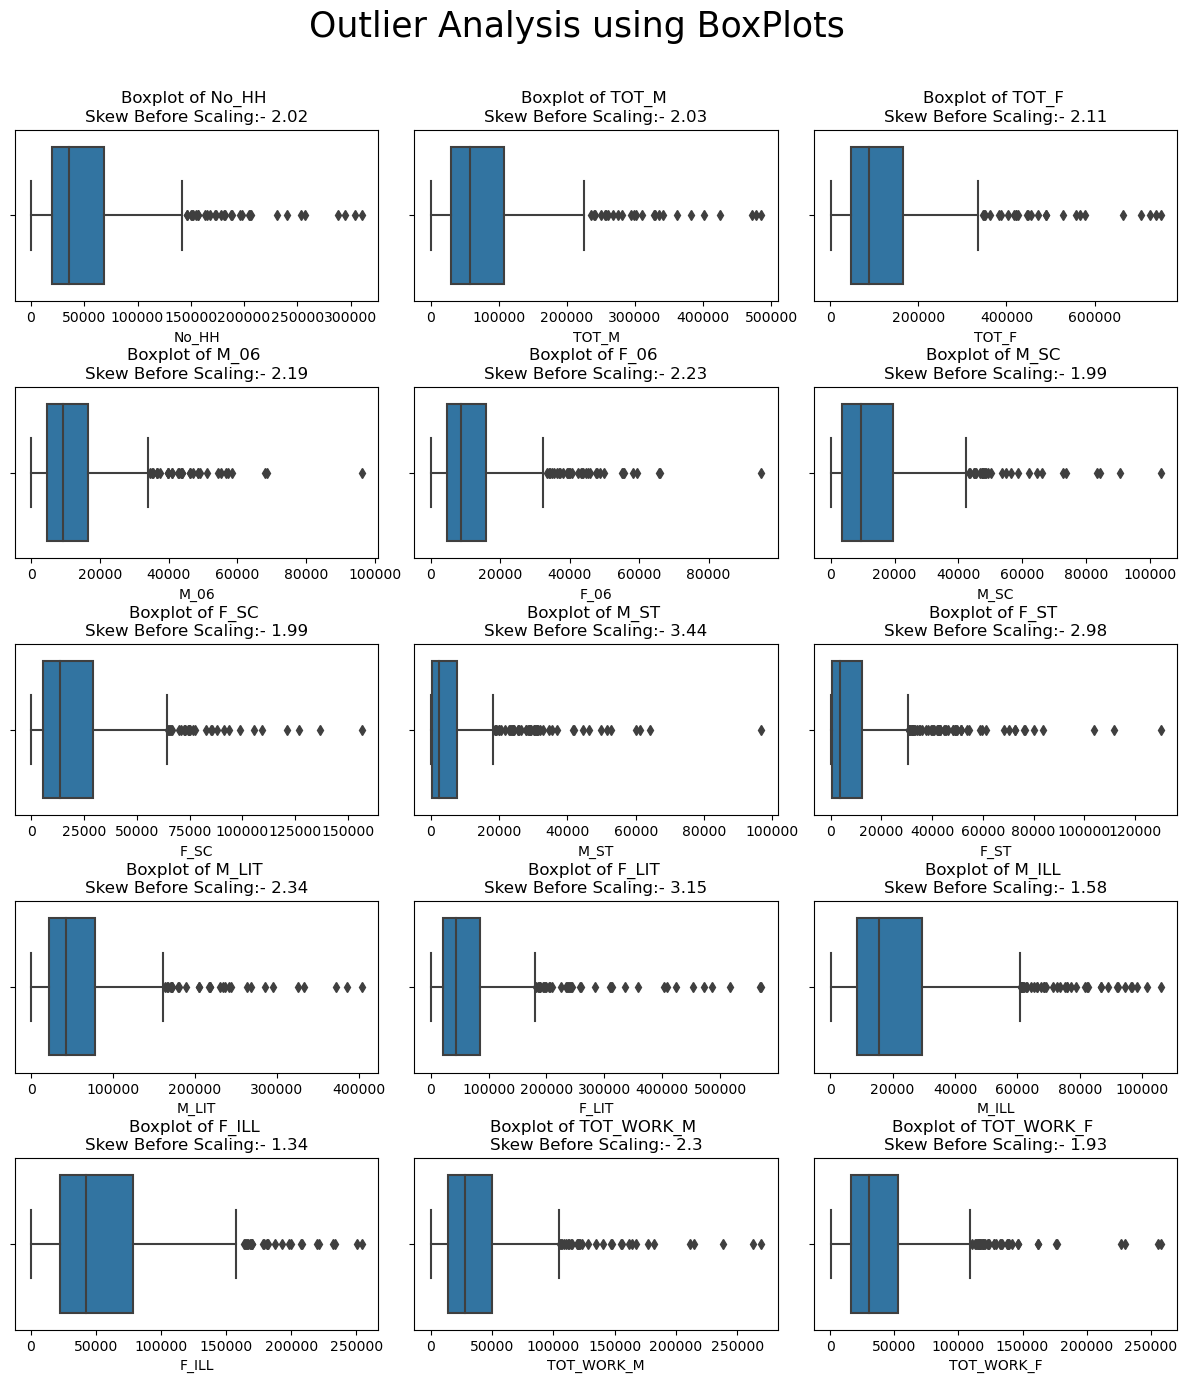

In [110]:
# for col in df_pca_census_data.columns:
#     fig = plt.figure(figsize=(15,4))
#     ax1 = fig.add_subplot(1,2,1)
#     ax2 = fig.add_subplot(1,2,2)
# 
#     sns.histplot(x=df_pca_census_data[col], bins=10, ax=ax1)
#     ax1.title.set_text(f'Histplot of Variable - {col}')
# 
#     sns.boxplot(x=df_pca_census_data[col], ax = ax2)
#     ax2.title.set_text(f'Boxplot of Variable - {col} \n Skew Before Scaling:- {round(df_pca_census_data[col].skew(),2)}')
#     plt.show()

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[0:15]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew Before Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()    

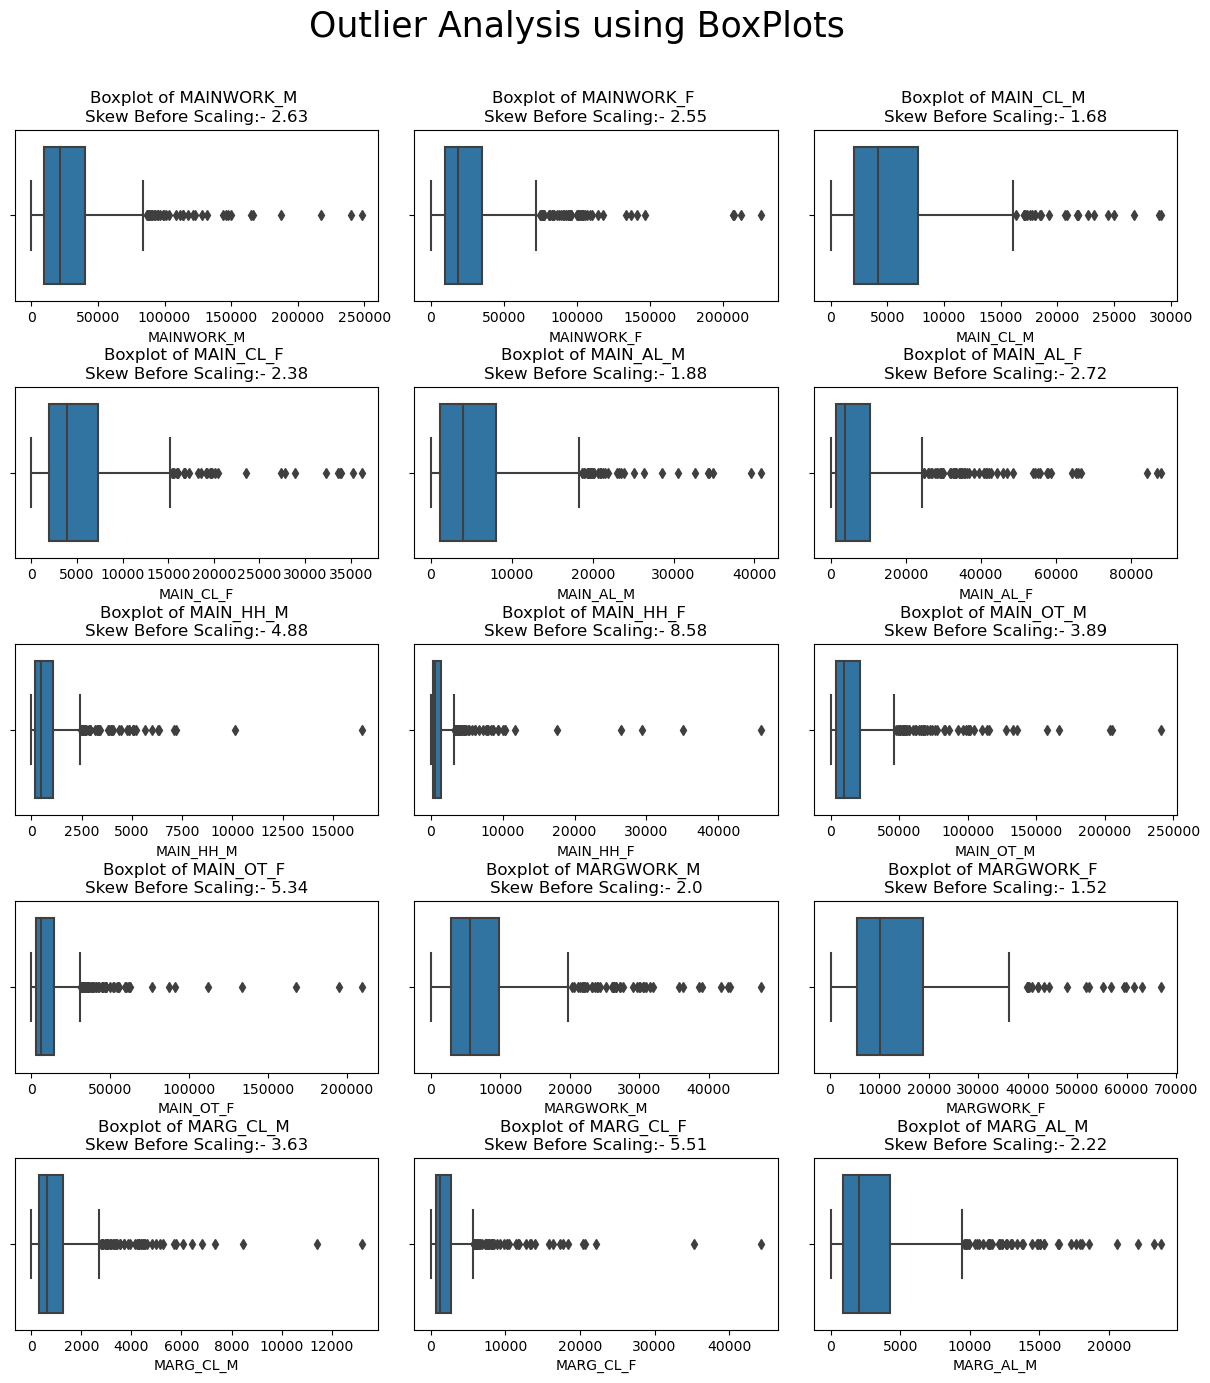

In [111]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[15:30]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew Before Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()    

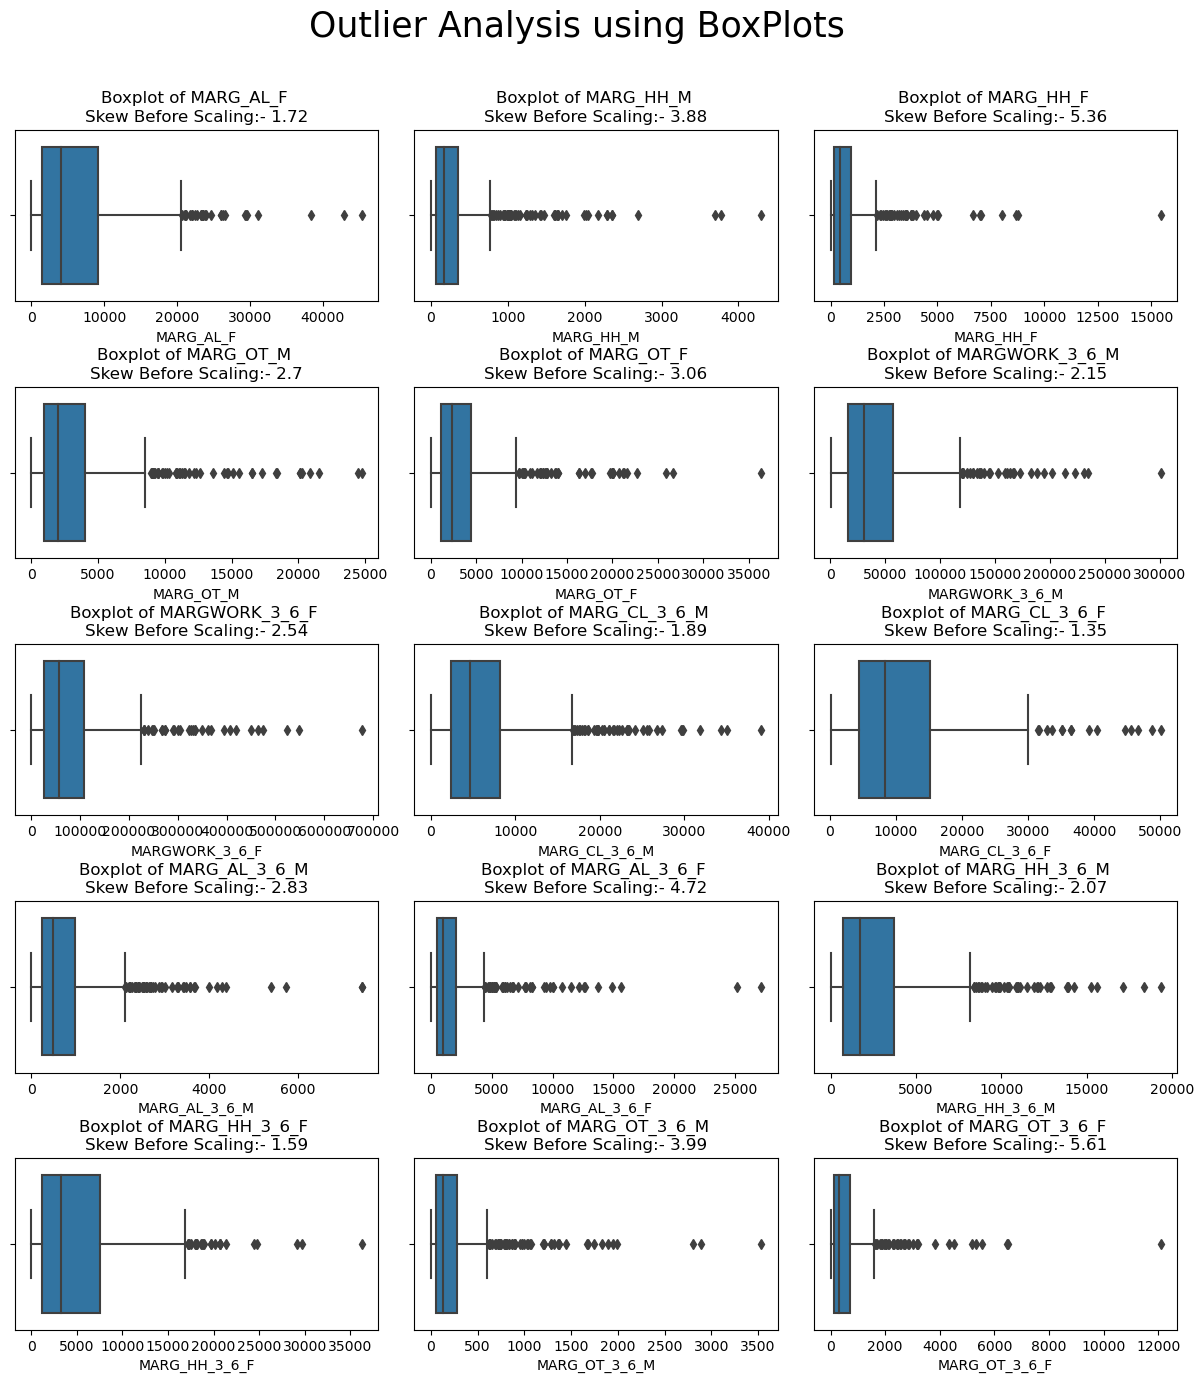

In [112]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[30:45]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew Before Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()    

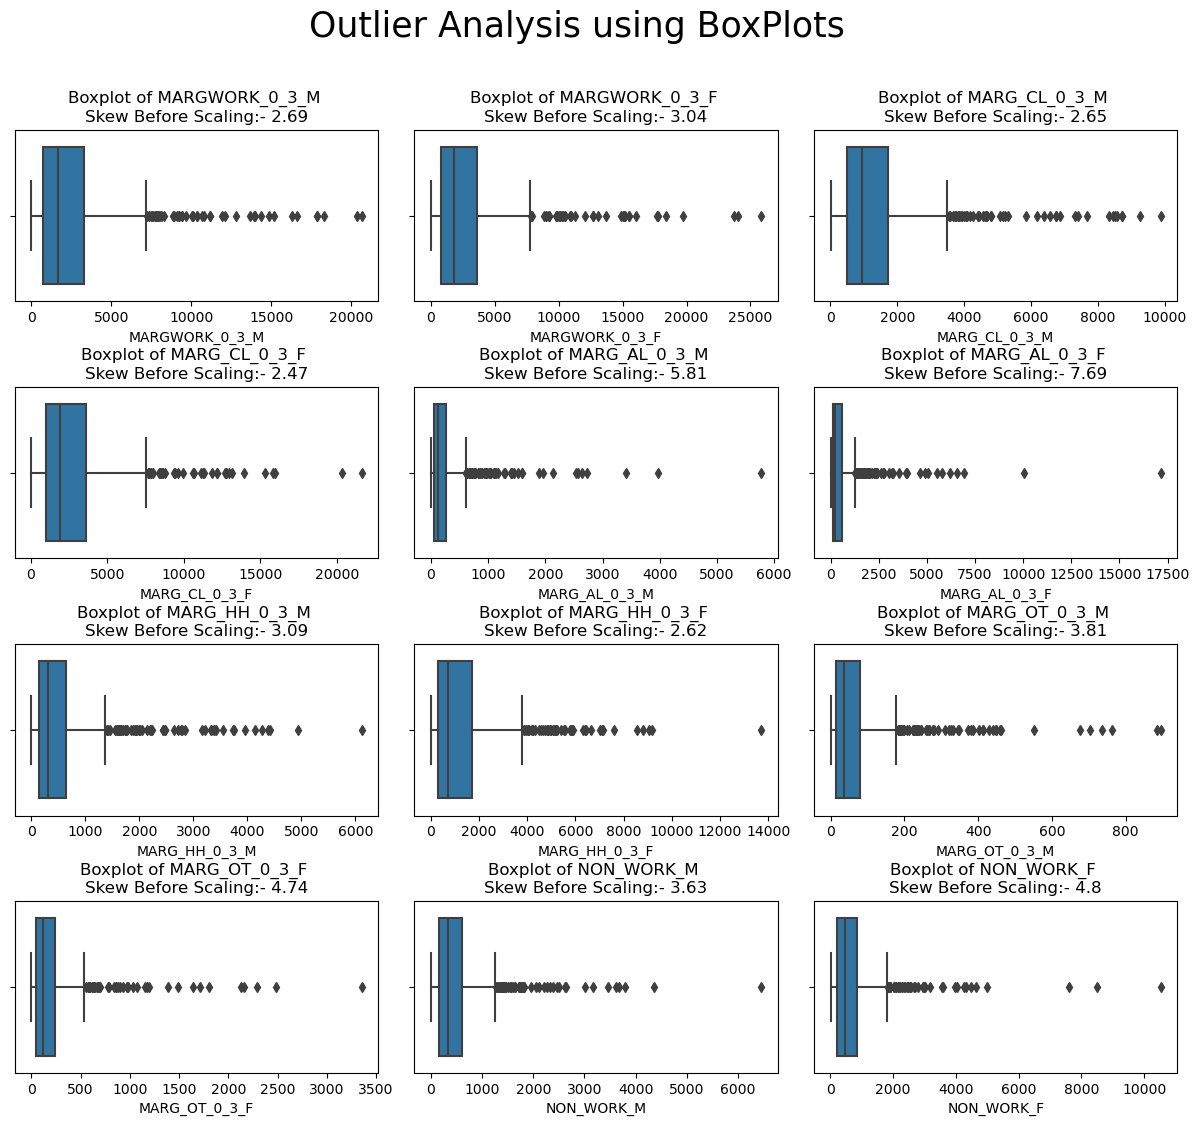

In [113]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[45:57]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew Before Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()    

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.4.2  Scaling the data using Z Score
            </span>   
        </font>    
</h3>

In [114]:
# scaling the data
scaler=StandardScaler()
df_pca_census_scaled_data=pd.DataFrame(scaler.fit_transform(df_pca_census_data), columns=df_pca_census_data.columns)

In [115]:
df_pca_census_scaled_data.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.90,-0.77,-0.82,-0.56,-0.51,-0.96,-0.96,-0.42,-0.48,-0.80,-0.73,-0.60,-0.80,-0.86,-1.01,-0.87,-0.90,-1.04,-0.99,-0.85,-0.68,-0.63,-0.41,-0.62,-0.61,-0.52,-0.97,-0.32,-0.49,-0.33,-0.86,-0.38,-0.45,-0.55,-0.61,-0.65,-0.66,-0.60,-1.02,-0.39,-0.56,-0.45,-0.90,-0.38,-0.43,-0.57,-0.61,-0.16,-0.72,-0.16,-0.29,0.16,-0.66,-0.37,-0.50,-0.41,-0.54
1,-0.94,-0.82,-0.87,-0.68,-0.73,-0.96,-0.96,-0.58,-0.61,-0.85,-0.78,-0.65,-0.87,-0.85,-1.00,-0.81,-0.88,-0.91,-0.96,-0.85,-0.69,-0.27,-0.33,-0.59,-0.61,-0.73,-0.97,-0.50,-0.46,-0.63,-0.87,0.11,-0.13,-0.68,-0.71,-0.75,-0.75,-0.76,-1.02,-0.58,-0.53,-0.66,-0.89,0.13,-0.15,-0.68,-0.71,-0.58,-0.73,-0.28,-0.29,-0.49,-0.72,0.04,-0.07,-0.61,-0.60
2,-0.97,-1.00,-0.98,-0.98,-0.97,-0.96,-0.96,-0.04,-0.03,-0.96,-0.81,-1.01,-1.08,-0.97,-0.98,-0.90,-0.84,-1.04,-0.80,-0.91,-0.69,-0.68,-0.42,-0.64,-0.57,-0.94,-1.02,-0.52,-0.30,-0.86,-0.93,-0.65,-0.63,-0.75,-0.75,-0.98,-0.90,-0.94,-1.02,-0.52,-0.24,-0.88,-0.95,-0.64,-0.62,-0.75,-0.74,-0.86,-0.92,-0.46,-0.42,-0.73,-0.80,-0.66,-0.64,-0.73,-0.71
3,-1.04,-1.05,-1.04,-1.02,-1.00,-0.96,-0.96,-0.36,-0.39,-1.00,-0.86,-1.06,-1.14,-1.02,-1.08,-0.94,-0.93,-1.14,-1.01,-0.91,-0.69,-0.68,-0.43,-0.68,-0.64,-0.98,-1.13,-0.69,-0.57,-0.86,-0.93,-0.66,-0.62,-0.78,-0.81,-1.03,-0.94,-1.01,-1.17,-0.79,-0.64,-0.88,-0.95,-0.67,-0.61,-0.80,-0.81,-0.81,-0.90,-0.42,-0.39,-0.72,-0.78,-0.62,-0.62,-0.65,-0.71
4,-0.82,-0.81,-0.81,-0.62,-0.65,-0.96,-0.96,0.15,0.04,-0.80,-0.71,-0.74,-0.84,-0.89,-0.90,-0.88,-0.87,-0.99,-0.89,-0.87,-0.68,-0.66,-0.41,-0.64,-0.59,-0.62,-0.70,0.22,0.04,-0.60,-0.80,-0.55,-0.39,-0.65,-0.48,-0.69,-0.71,-0.68,-0.81,0.08,-0.13,-0.63,-0.83,-0.58,-0.41,-0.67,-0.52,-0.35,-0.30,0.47,0.43,-0.47,-0.63,-0.44,-0.31,-0.54,-0.25


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.4.3  Comparing the boxplot of Variables Before and After Scaling
            </span>   
        </font>    
</h3>

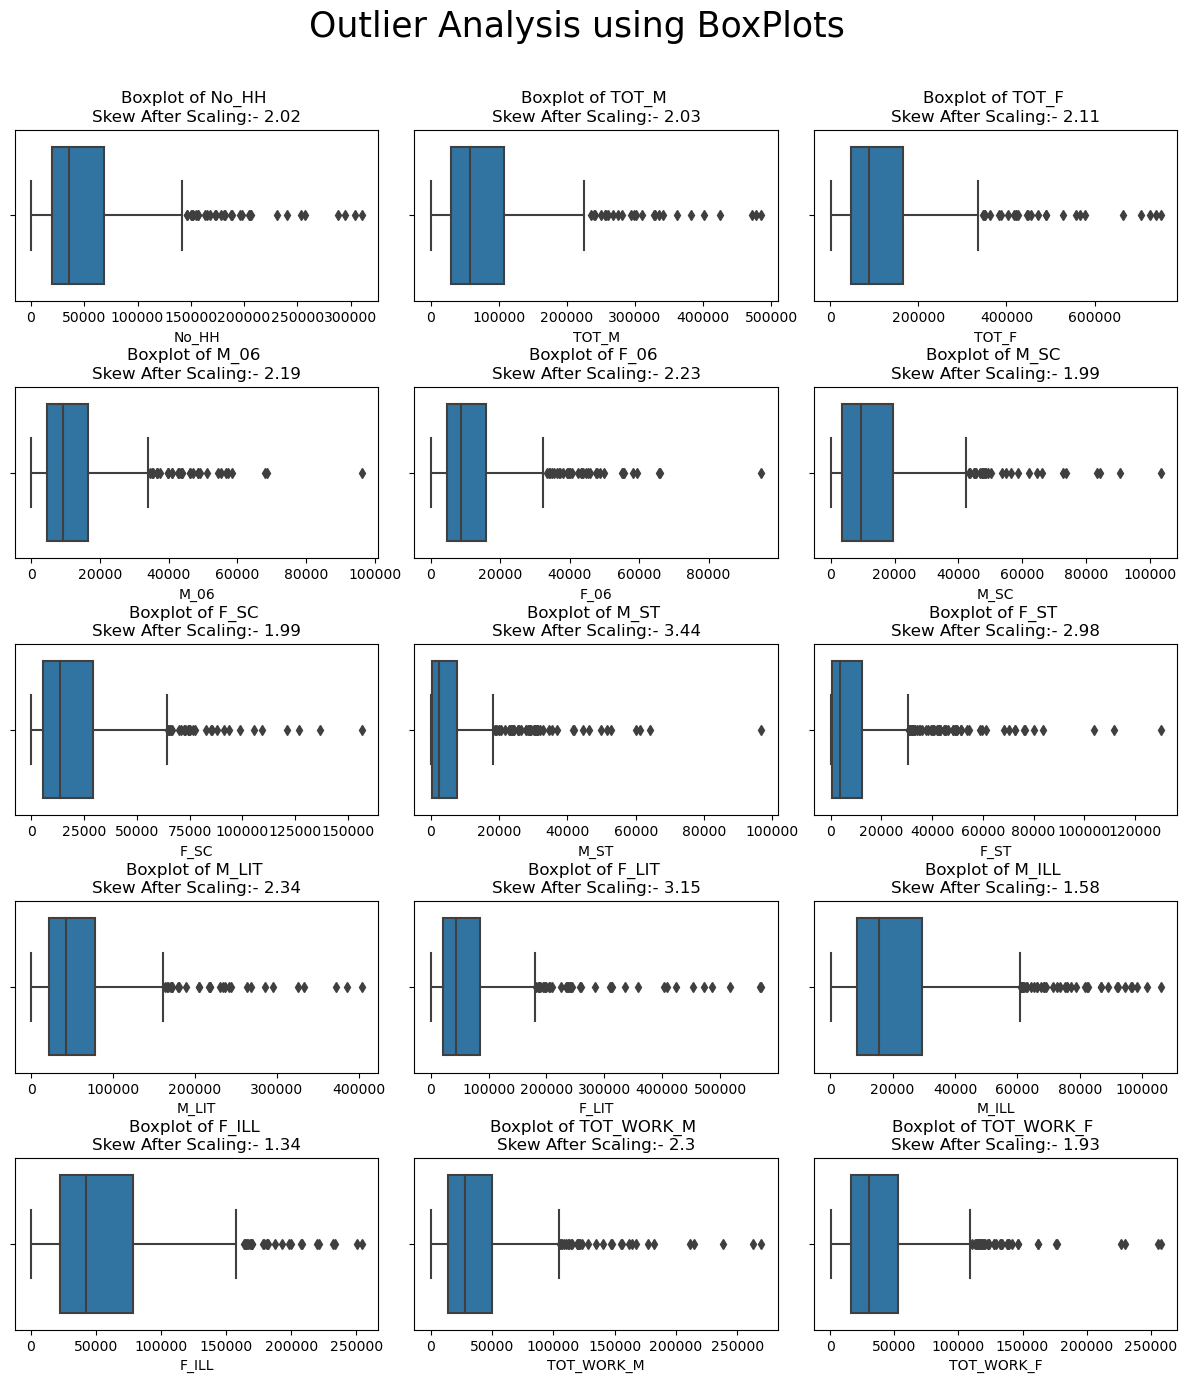

In [116]:
# for col in df_pca_census_data.columns:
#     fig = plt.figure(figsize=(15,4))
#     ax1 = fig.add_subplot(1,2,1)
#     ax2 = fig.add_subplot(1,2,2)
# 
#     sns.boxplot(x=df_pca_census_data[col], ax=ax1)
#     ax1.title.set_text(f'Variable - {col} \n Skew Before Scaling:- {round(df_pca_census_data[col].skew(),2)}')
# 
#     sns.boxplot(x=df_pca_census_scaled_data[col], ax = ax2)
#     ax2.title.set_text(f'Variable - {col} \n Skew After Scaling:- {round(df_pca_census_scaled_data[col].skew(),2)}')
#     plt.show()

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[0:15]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew After Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()

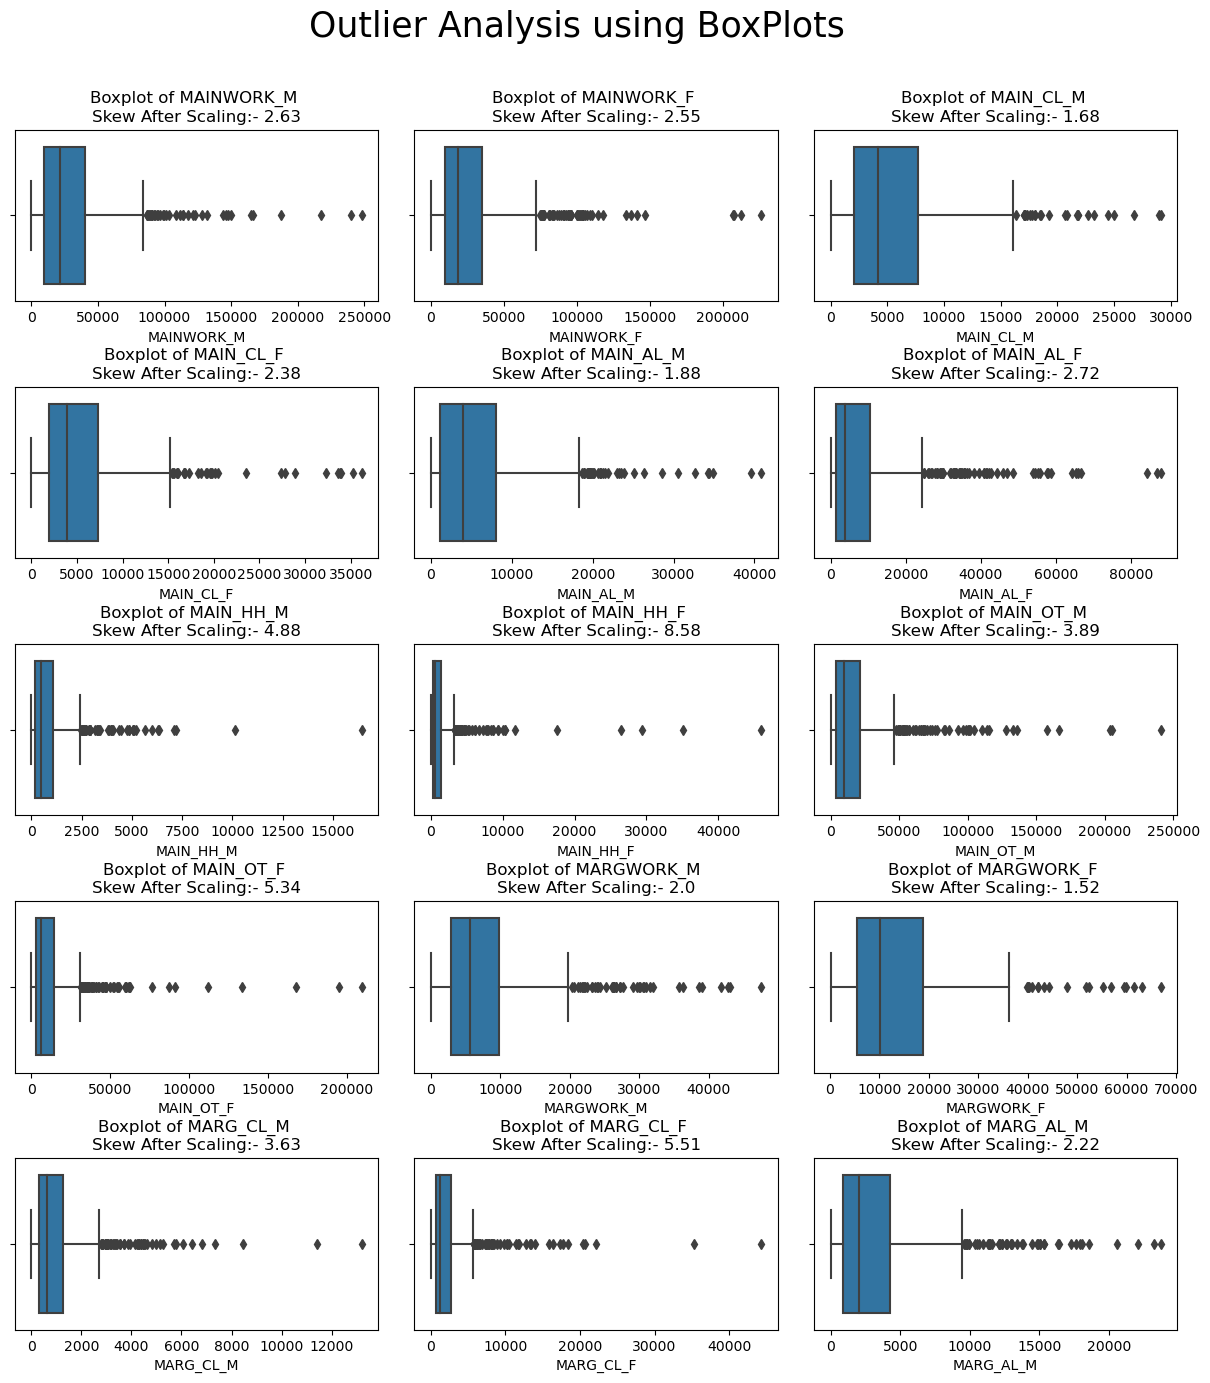

In [117]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[15:30]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew After Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()

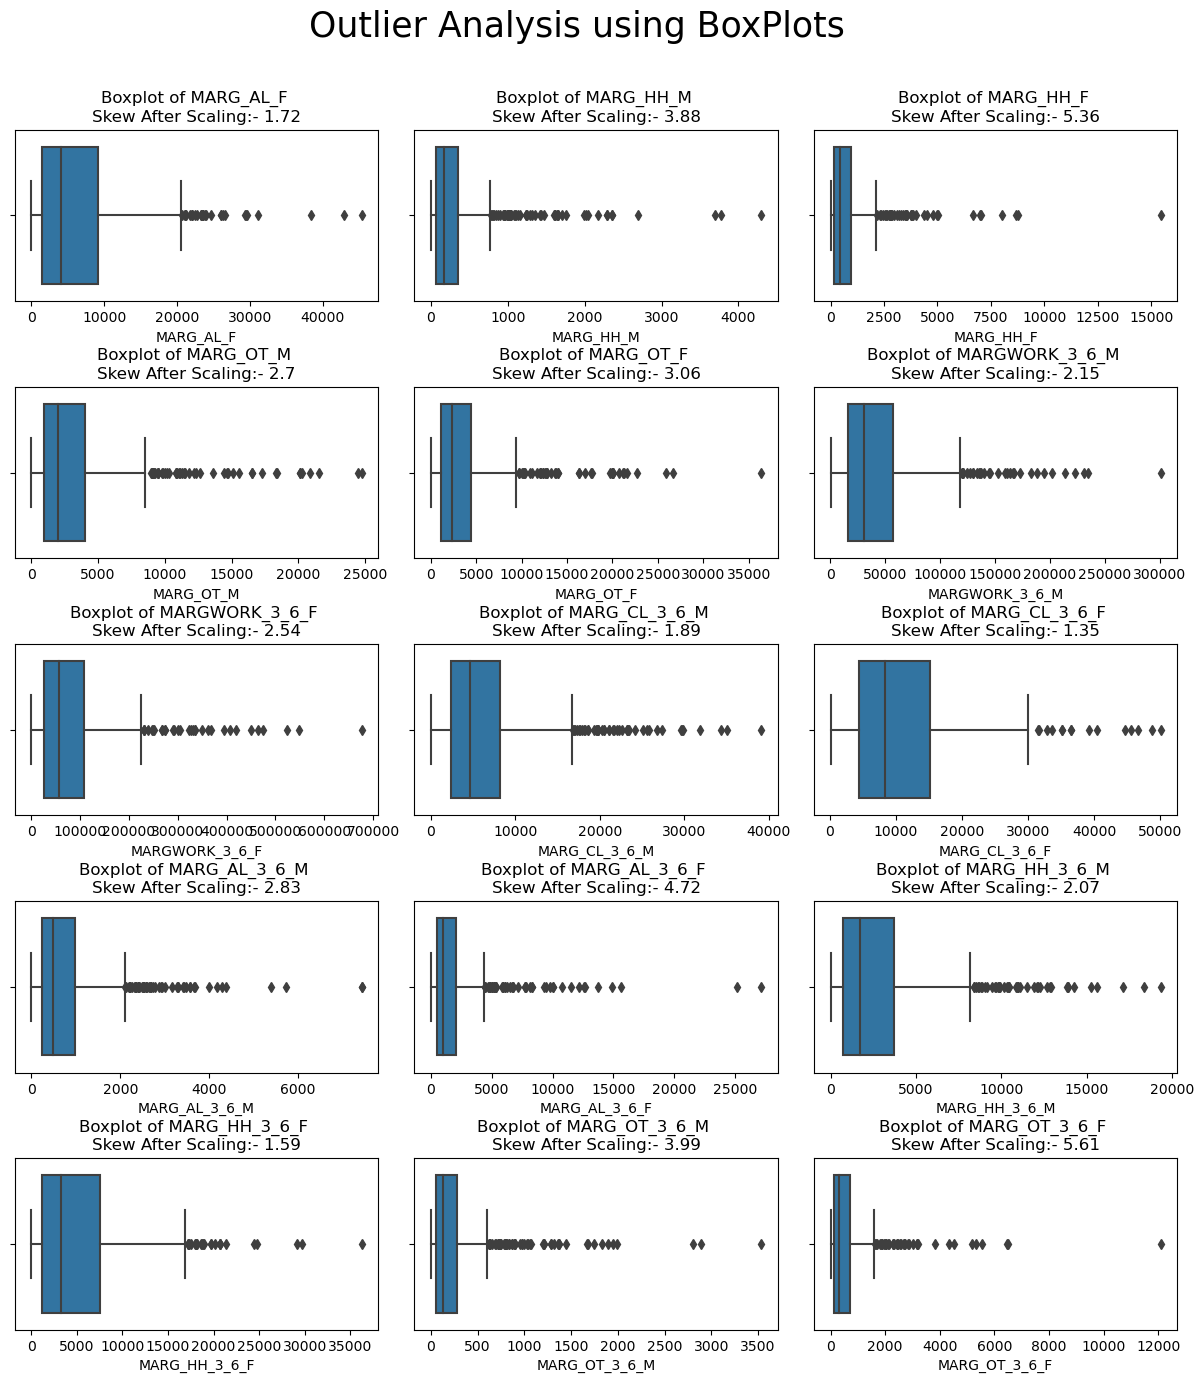

In [118]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[30:45]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew After Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()

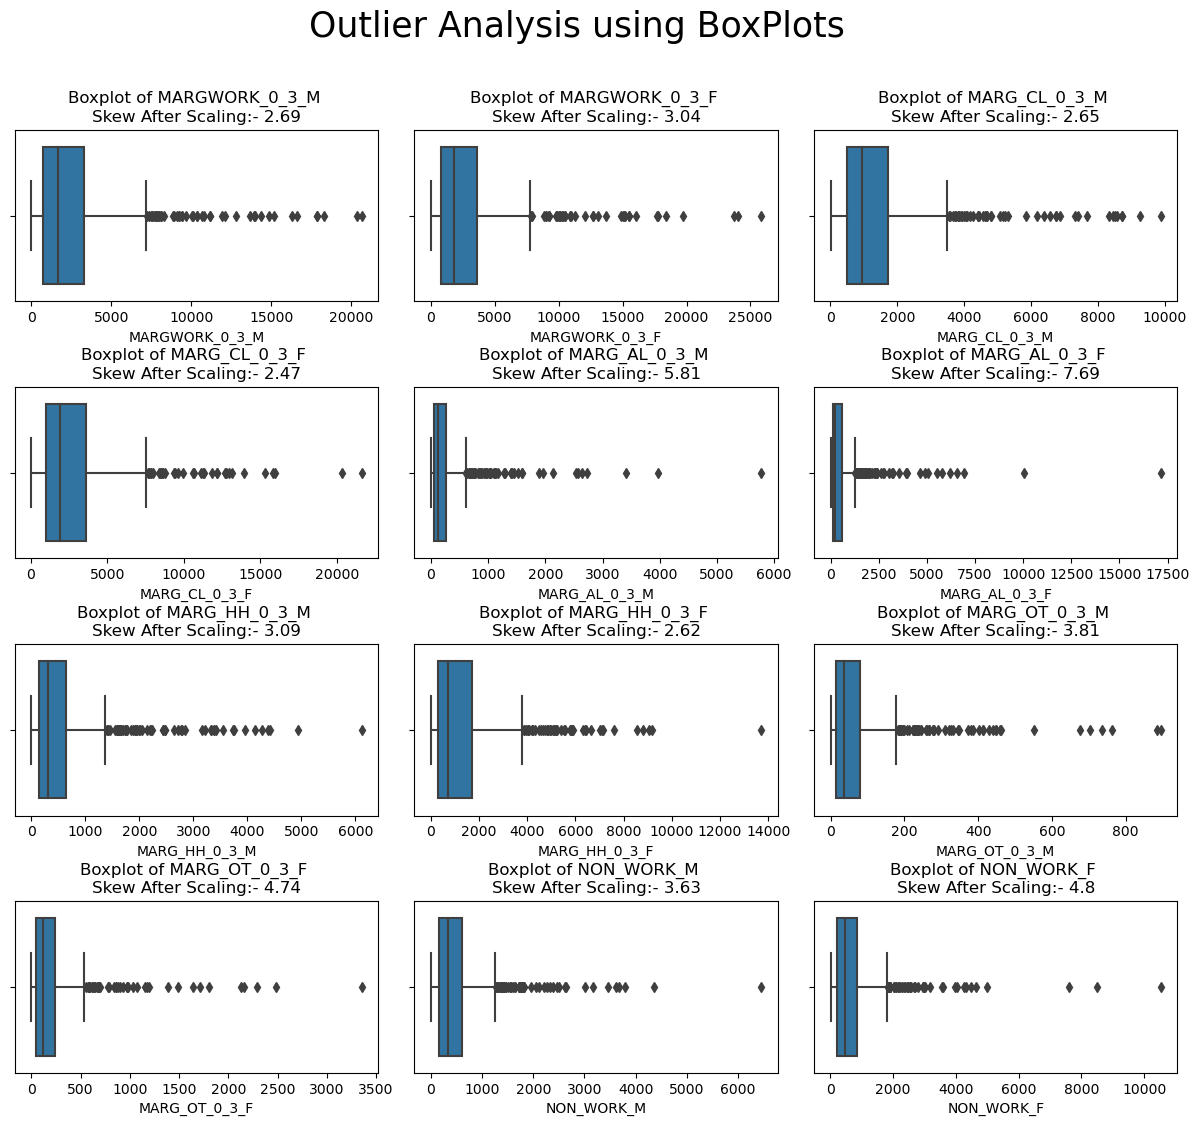

In [119]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
# fig.tight_layout()

for i, col in enumerate(df_pca_census_data.select_dtypes(include=['float64','int64']).columns[45:57]):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_pca_census_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew After Scaling:- {round(df_pca_census_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <font size="3" color = Blue >
            <ul>
                <li>1. Does scaling have any impact on outliers? - Scaling has no impact on outliers. It transforms the data in such a way that it will have a mean of zero and a standard deviation of 1. It also applies linear transformation, here data is shifted by the mean and scaled by the 1/(standard deviation). It doesn’t change the shape of the data and hence preserving the distribution of data.</li>
                <li>2. Skewness and Outliers in the dataset before and after scaling is same.</li>
                <li>3. We can observe the boxplots, along with skewness shown above. It doesn't show any change even after scaling.</li>
            </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.5 Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector
            </span>   
        </font>    
</h3>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.5.1 Statistical tests to be done before PCA
            </span>   
        </font>    
</h3>

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [120]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_squared_val, p_value = calculate_bartlett_sphericity(df_pca_census_scaled_data)
p_value

0.0

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [121]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_pca_census_scaled_data)
kmo_model

0.8039889932781237

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>1. p-value for Barletts Test of Sphericity is 0.0, which means there is atleast one pair of variables in the data which are correlated
        <br>2. Measure of Sample Adequacy is 0.80, which means that PCA will help us to provide the considerable reduction in the dimension and extraction of meaningful components. 
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.5.2 Principal Component Analysis
            </span>   
        </font>    
</h3>

##### Apply PCA for the components to get the loadings and component output

- We will generate PCA dimensions for all the variables and identify the PCA with 90% of explained variance
- We will use sklearn.decomposition PCA to get the following components.
- a. Principal components for the data in the form of component Output (Eigen vectors) - census_pca.components_ 
- c. Eigen values are determined by - census_pca.explained_variance_
- d. The percentage of variance explained by each principal component - census_pca.explained_variance_ratio_

In [122]:
from sklearn.decomposition import PCA

#Defining the number of principal components to generate 
n=df_pca_census_scaled_data.shape[1]

#Finding principal components for the data
census_pca = PCA(n_components=n, random_state=123)
transformed_census_pca1= pd.DataFrame(census_pca.fit_transform(df_pca_census_scaled_data))

#The percentage of variance explained by each principal component
exp_var = census_pca.explained_variance_ratio_

In [123]:
transformed_census_pca1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-4.62,0.14,0.33,1.54,0.35,-0.42,-0.01,0.48,0.05,-0.04,0.22,0.31,0.22,-0.54,0.09,0.13,0.06,0.10,-0.03,-0.16,-0.09,-0.01,0.01,-0.29,-0.16,-0.06,-0.06,-0.12,0.08,0.00,0.21,0.06,0.02,-0.04,0.01,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
1,-4.77,-0.11,0.24,1.96,-0.15,0.42,-0.02,-0.01,0.42,-0.19,0.40,0.32,-0.16,-0.16,-0.01,0.10,-0.06,0.23,0.27,0.07,-0.04,-0.00,0.03,-0.06,-0.05,0.12,0.07,-0.04,0.04,-0.01,-0.03,-0.00,-0.00,-0.01,-0.05,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
2,-5.96,-0.29,0.37,0.62,0.48,0.28,0.07,0.04,0.16,0.01,0.13,0.02,0.10,-0.11,-0.13,-0.02,0.00,-0.18,0.08,0.04,0.15,-0.07,0.03,-0.07,-0.10,-0.01,0.07,0.03,0.01,-0.02,-0.01,-0.02,-0.03,0.02,-0.01,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
3,-6.28,-0.50,0.21,1.07,0.30,0.05,-0.25,0.08,0.15,0.12,0.14,0.18,0.10,-0.09,-0.06,-0.04,0.04,0.10,0.05,-0.02,-0.03,-0.02,0.01,0.01,-0.02,-0.03,0.00,-0.03,0.03,0.01,0.02,-0.04,-0.03,0.01,0.01,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-4.48,0.89,1.08,0.54,0.80,0.34,-0.09,0.38,-0.07,0.20,0.44,0.18,-0.02,-0.28,-0.09,0.27,-0.22,0.13,0.09,-0.17,-0.18,0.09,0.05,0.05,0.19,-0.00,-0.07,-0.10,-0.05,0.04,0.03,-0.02,0.02,-0.00,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-6.26,-0.85,0.24,1.17,0.06,-0.16,-0.37,0.16,0.18,-0.04,0.09,0.14,-0.00,-0.06,-0.05,-0.06,-0.02,0.05,-0.00,0.03,0.02,0.03,-0.01,-0.02,-0.00,0.02,0.01,-0.00,0.01,0.00,0.01,0.01,-0.04,0.01,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
636,-5.77,-0.90,0.17,1.10,0.06,-0.16,-0.51,0.15,0.14,0.11,0.01,0.17,0.01,-0.07,-0.06,-0.03,0.01,0.03,0.05,0.03,-0.00,-0.02,0.02,-0.01,-0.01,0.04,0.02,0.00,-0.00,0.02,0.02,-0.01,-0.03,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
637,-6.29,-0.64,0.11,1.37,0.15,0.14,-0.34,-0.04,0.19,0.03,0.13,0.20,0.02,-0.14,-0.07,-0.04,-0.01,0.10,0.09,0.06,-0.00,0.00,0.01,-0.00,-0.04,0.03,0.03,-0.01,0.01,-0.01,0.00,-0.02,-0.02,0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
638,-6.22,-0.67,0.27,1.14,0.06,-0.12,-0.38,0.06,0.09,0.02,0.05,0.13,0.04,-0.12,0.06,-0.05,0.01,0.06,0.07,-0.03,-0.01,-0.04,-0.01,0.01,-0.03,-0.02,0.03,0.00,0.00,0.00,0.02,-0.00,-0.02,0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00


In [124]:
df_pca_census_scaled_data.cov()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,0.93,0.76,0.86,0.94,0.93,0.93,0.89,0.43,0.38,0.67,0.59,0.64,0.49,0.85,0.82,0.68,0.70,0.17,0.08,0.44,0.49,0.50,0.54,0.80,0.83,0.85,0.92,0.69,0.72,0.21,0.09,0.45,0.50,0.50,0.53,0.80,0.83,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,0.93,0.91,0.89,0.97,0.81,0.93,0.75,0.53,0.36,0.59,0.38,0.74,0.44,0.85,0.75,0.81,0.70,0.30,0.15,0.54,0.45,0.67,0.58,0.89,0.84,0.98,0.98,0.82,0.72,0.35,0.17,0.55,0.44,0.67,0.57,0.89,0.84,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,0.96,0.86,0.89,0.97,0.88,0.94,0.82,0.49,0.39,0.62,0.47,0.70,0.47,0.86,0.80,0.77,0.72,0.26,0.14,0.50,0.48,0.61,0.57,0.87,0.86,0.94,0.98,0.78,0.74,0.31,0.15,0.51,0.47,0.60,0.56,0.87,0.86,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,0.83,0.95,0.86,0.86,0.68,0.79,0.59,0.56,0.38,0.55,0.30,0.66,0.36,0.69,0.56,0.85,0.72,0.42,0.24,0.64,0.49,0.70,0.54,0.84,0.75,0.99,0.94,0.86,0.72,0.47,0.25,0.64,0.47,0.69,0.53,0.84,0.74,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,0.83,0.95,0.87,0.85,0.69,0.79,0.59,0.56,0.38,0.56,0.30,0.66,0.36,0.68,0.56,0.86,0.72,0.42,0.23,0.65,0.50,0.70,0.55,0.84,0.75,0.99,0.94,0.87,0.72,0.48,0.25,0.65,0.48,0.70,0.54,0.84,0.74,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,0.72,0.80,0.83,0.83,0.71,0.78,0.65,0.61,0.36,0.63,0.41,0.71,0.39,0.64,0.58,0.75,0.66,0.30,0.15,0.56,0.46,0.67,0.57,0.75,0.69,0.81,0.80,0.75,0.66,0.34,0.16,0.57,0.45,0.66,0.56,0.74,0.69,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,0.73,0.76,0.85,0.82,0.78,0.78,0.71,0.58,0.39,0.67,0.51,0.68,0.42,0.64,0.60,0.73,0.68,0.28,0.14,0.55,0.51,0.63,0.57,0.73,0.70,0.79,0.79,0.73,0.70,0.32,0.15,0.56,0.51,0.63,0.55,0.72,0.70,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,0.10,0.08,0.14,0.12,0.27,0.11,0.23,0.10,0.19,0.14,0.20,-0.03,0.03,0.09,0.17,0.12,0.27,0.09,0.06,0.14,0.31,-0.01,0.09,0.07,0.12,0.06,0.05,0.12,0.28,0.12,0.08,0.14,0.32,-0.02,0.09,0.06,0.11,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,0.10,0.07,0.15,0.12,0.29,0.11,0.25,0.08,0.20,0.15,0.23,-0.03,0.04,0.08,0.17,0.12,0.29,0.08,0.06,0.15,0.35,-0.02,0.10,0.06,0.12,0.05,0.05,0.12,0.31,0.11,0.08,0.15,0.37,-0.02,0.10,0.05,0.11,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,0.97,0.84,0.84,0.98,0.82,0.95,0.77,0.47,0.33,0.54,0.37,0.73,0.45,0.90,0.80,0.75,0.66,0.26,0.13,0.46,0.39,0.62,0.55,0.90,0.86,0.95,0.99,0.76,0.68,0.30,0.14,0.46,0.38,0.61,0.54,0.89,0.86,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


### Eigen Vector

In [125]:
eigen_vector= census_pca.components_

In [126]:
eigen_vector

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [-0.        , -0.17278849, -0.09520952, ...,  0.00987322,
        -0.04362296, -0.0207041 ],
       [-0.        , -0.0116324 , -0.0814326 , ...,  0.04647201,
        -0.17212428,  0.03763315],
       [ 0.        ,  0.18260602,  0.03874463, ..., -0.00370238,
        -0.05681626, -0.03729932]])

### Eigen Value 

In [127]:
census_pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

### The explained variance for each PC

In [128]:
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
var_exp = census_pca.explained_variance_ratio_
var_exp

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>(A) Eigen Vector is given by census_pca.components_
        <br>(B) Eigen Value is given by census_pca.explained_variance_
        <br>(C) We have analyzed that we can perform Principal compnent Analysis and reduce the dimensionality from 57 variables to just 6.
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.6 Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.
            </span>   
        </font>    
</h3>

- We will make use of the explained_variance_ratio_ to find the number of PC that can cover maximum variances among the variables, thereby reducing the dimensions of the PCA

In [129]:
np.cumsum(var_exp)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.6.1 (A) Scree Plot
            </span>   
        </font>    
</h3>

Text(0, 0.5, 'Cumulative Explained Variance')

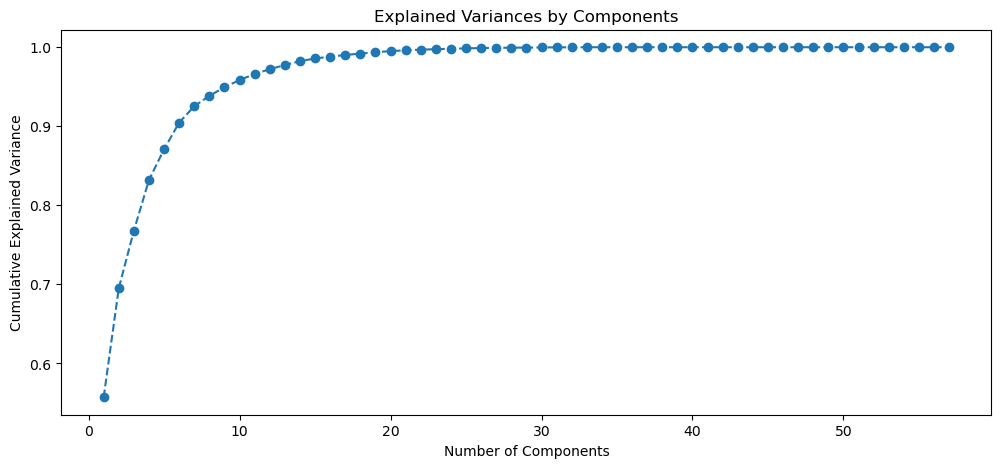

In [130]:
# visualize the explained variance by individual components
plt.figure(figsize = (12,5))
plt.plot(range(1,58), var_exp.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.6.1 (B) To find the least number of components that can explain more than 90% variance
            </span>   
        </font>    
</h3>

In [131]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  6


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>1. By summing the cumulative values of explain_variance, we could observe that 6th PCA will cover 90.47243 % of the variances. 
        <br>2. Scree Plot can be used to observe that after 6th PCA, the change is pretty much even and may not be very helpful in explaining the major amount of variance for the variables.
        <br>3. We have analyzed that we can perform Principal compnent Analysis and reduce the dimensionality from 57 variables to just 6.
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.7 Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables
            </span>   
        </font>    
</h3>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.7.1 Creating DataFrame with Coefficients of all PCs
            </span>   
        </font>    
</h3>

In [132]:
#Create a dataframe containing the loadings or coefficients of all PCs
pc_comps = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6']
df_extracted_census = pd.DataFrame(np.round(census_pca.components_[:6,:],4),index=pc_comps,columns=df_pca_census_scaled_data.columns).T

In [133]:
df_extracted_census.head()

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.16,-0.13,-0.00,-0.13,-0.01,0.00
TOT_M,0.17,-0.09,0.06,-0.02,-0.03,-0.07
TOT_F,0.17,-0.10,0.04,-0.07,-0.01,-0.04
M_06,0.16,-0.02,0.06,0.01,-0.05,-0.16
F_06,0.16,-0.02,0.05,0.01,-0.04,-0.15


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.7.2 Creating heatmap for Six Principal Components against all the Variables
            </span>   
        </font>    
</h3>

In [134]:
from matplotlib.patches import Rectangle

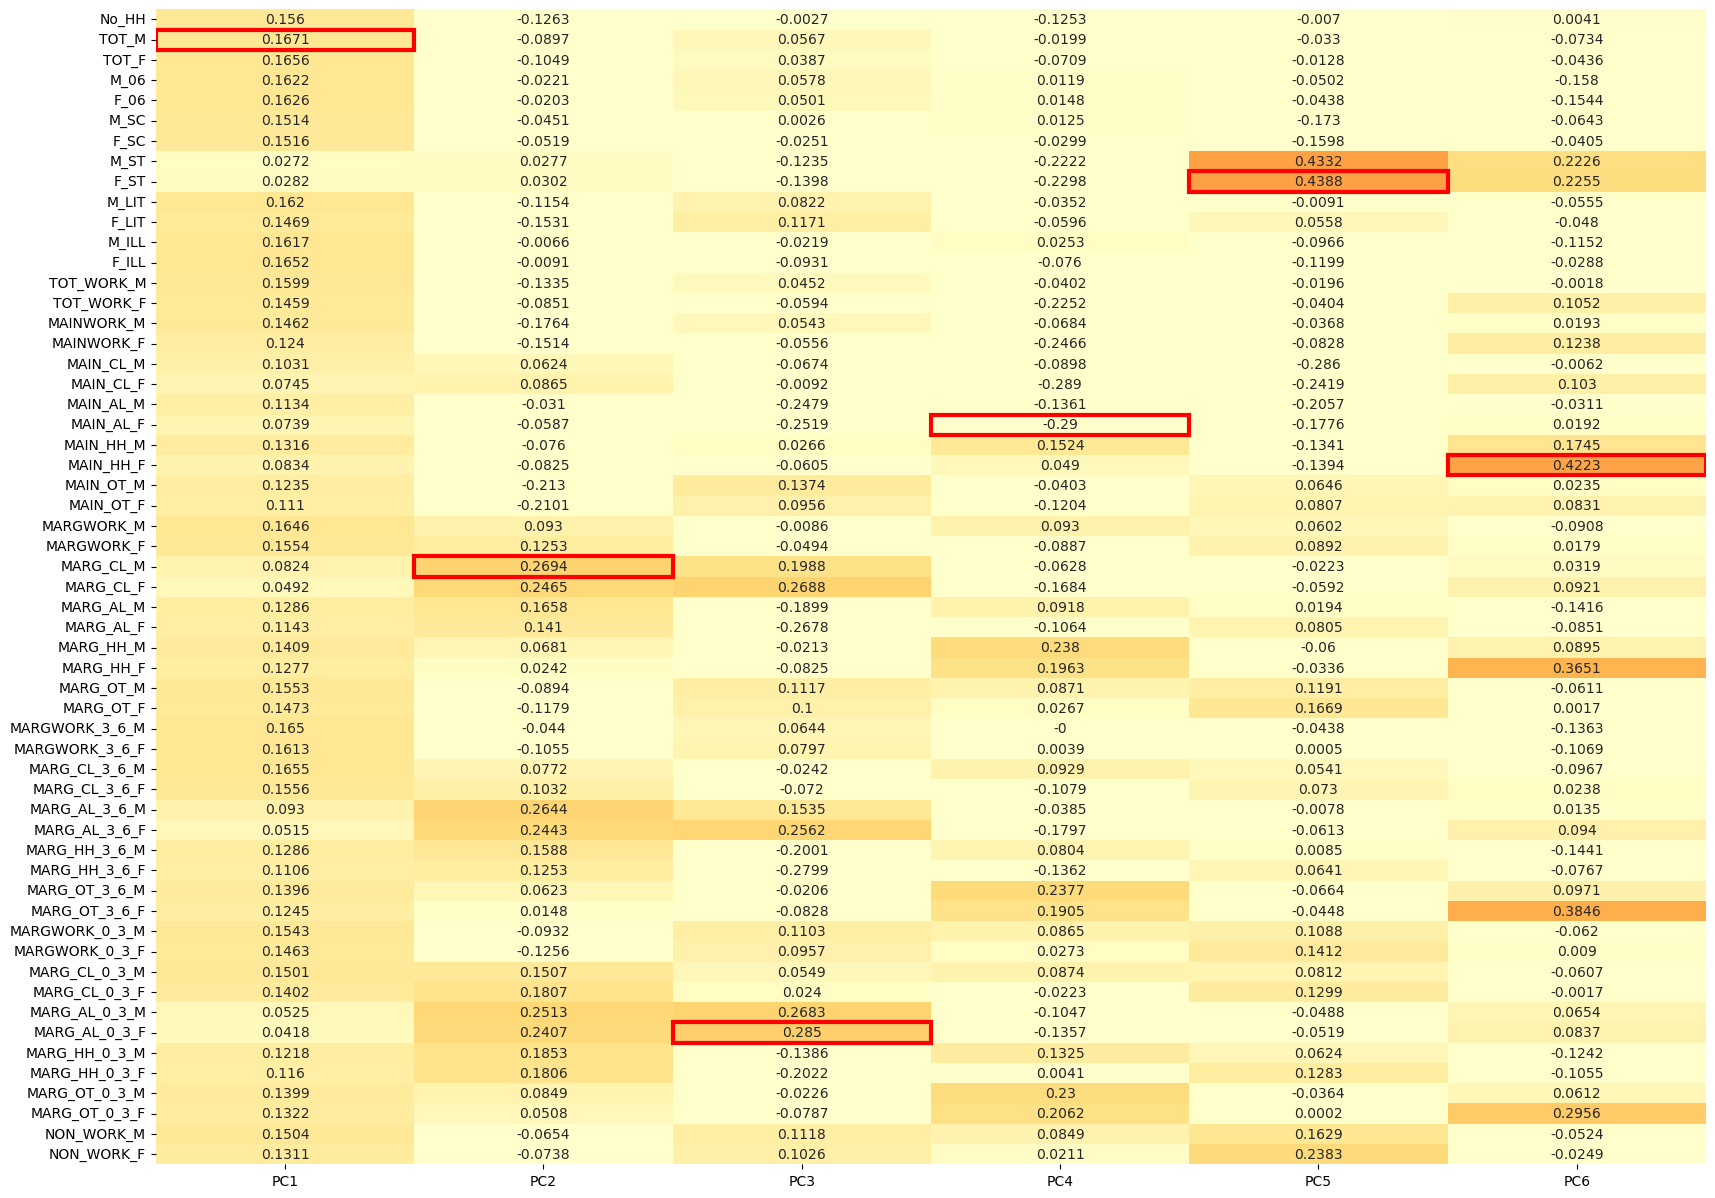

In [135]:
#Compare how the original features influence various PCs
fig,ax = plt.subplots(figsize=(20, 15), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_extracted_census, annot=True, 
                 vmax=1, vmin=0.0, 
                 cmap='YlOrRd', cbar=False, fmt='.4g', ax=ax
                )

column_max = df_extracted_census.abs().idxmax(axis=0)

for col, variable in enumerate(df_extracted_census.columns):
    position = df_extracted_census.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br>PC1 alone captures the most numbers of variability in the data. In this case it captures 55.7% of variability in the data.
        <br>PC2 captures the 2nd highest variability of the data- 13.8% of the variability in the data.
        <br>Features that are highlighted in the figure below is the most important features in that principal component.
        <br>PC1 has almost 47 columns highlighted. So, variability in those 47 columns is covered in PC1. That is PC1 has given higher weightage to these columns.
        <br>PC2 has 21 columns highlighted in the figure below, so PC2 has given higher weightage to these columns… and it goes on.
        <br>The highlighted red line shows the highest weightage PC has given to a particular feature in each PC. There could be some overlap but that doesn’t undermine the usability of the PC.
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            2.8  Write linear equation for first PC
            </span>   
        </font>    
</h3>

In [136]:
df_extracted_census

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.16,-0.13,-0.00,-0.13,-0.01,0.00
TOT_M,0.17,-0.09,0.06,-0.02,-0.03,-0.07
TOT_F,0.17,-0.10,0.04,-0.07,-0.01,-0.04
M_06,0.16,-0.02,0.06,0.01,-0.05,-0.16
F_06,0.16,-0.02,0.05,0.01,-0.04,-0.15
M_SC,0.15,-0.05,0.00,0.01,-0.17,-0.06
F_SC,0.15,-0.05,-0.03,-0.03,-0.16,-0.04
M_ST,0.03,0.03,-0.12,-0.22,0.43,0.22
F_ST,0.03,0.03,-0.14,-0.23,0.44,0.23
M_LIT,0.16,-0.12,0.08,-0.04,-0.01,-0.06


In [137]:
for k in range(0,len(df_extracted_census.index)):
    print(f'({df_extracted_census.iloc[k][0]} x {df_extracted_census.index[k]})',end="  +  ")

(0.156 x No_HH)  +  (0.1671 x TOT_M)  +  (0.1656 x TOT_F)  +  (0.1622 x M_06)  +  (0.1626 x F_06)  +  (0.1514 x M_SC)  +  (0.1516 x F_SC)  +  (0.0272 x M_ST)  +  (0.0282 x F_ST)  +  (0.162 x M_LIT)  +  (0.1469 x F_LIT)  +  (0.1617 x M_ILL)  +  (0.1652 x F_ILL)  +  (0.1599 x TOT_WORK_M)  +  (0.1459 x TOT_WORK_F)  +  (0.1462 x MAINWORK_M)  +  (0.124 x MAINWORK_F)  +  (0.1031 x MAIN_CL_M)  +  (0.0745 x MAIN_CL_F)  +  (0.1134 x MAIN_AL_M)  +  (0.0739 x MAIN_AL_F)  +  (0.1316 x MAIN_HH_M)  +  (0.0834 x MAIN_HH_F)  +  (0.1235 x MAIN_OT_M)  +  (0.111 x MAIN_OT_F)  +  (0.1646 x MARGWORK_M)  +  (0.1554 x MARGWORK_F)  +  (0.0824 x MARG_CL_M)  +  (0.0492 x MARG_CL_F)  +  (0.1286 x MARG_AL_M)  +  (0.1143 x MARG_AL_F)  +  (0.1409 x MARG_HH_M)  +  (0.1277 x MARG_HH_F)  +  (0.1553 x MARG_OT_M)  +  (0.1473 x MARG_OT_F)  +  (0.165 x MARGWORK_3_6_M)  +  (0.1613 x MARGWORK_3_6_F)  +  (0.1655 x MARG_CL_3_6_M)  +  (0.1556 x MARG_CL_3_6_F)  +  (0.093 x MARG_AL_3_6_M)  +  (0.0515 x MARG_AL_3_6_F)  +  (0.1286

### Linear equation for first PC:

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <br> (0.156 x No_HH)  +  (0.1671 x TOT_M)  +  (0.1656 x TOT_F)  +  (0.1622 x M_06)  +  (0.1626 x F_06)  +  (0.1514 x M_SC)  +  (0.1516 x F_SC)  +  (0.0272 x M_ST)  +  (0.0282 x F_ST)  +  (0.162 x M_LIT)  +  (0.1469 x F_LIT)  +  (0.1617 x M_ILL)  +  (0.1652 x F_ILL)  +  (0.1599 x TOT_WORK_M)  +  (0.1459 x TOT_WORK_F)  +  (0.1462 x MAINWORK_M)  +  (0.124 x MAINWORK_F)  +  (0.1031 x MAIN_CL_M)  +  (0.0745 x MAIN_CL_F)  +  (0.1134 x MAIN_AL_M)  +  (0.0739 x MAIN_AL_F)  +  (0.1316 x MAIN_HH_M)  +  (0.0834 x MAIN_HH_F)  +  (0.1235 x MAIN_OT_M)  +  (0.111 x MAIN_OT_F)  +  (0.1646 x MARGWORK_M)  +  (0.1554 x MARGWORK_F)  +  (0.0824 x MARG_CL_M)  +  (0.0492 x MARG_CL_F)  +  (0.1286 x MARG_AL_M)  +  (0.1143 x MARG_AL_F)  +  (0.1409 x MARG_HH_M)  +  (0.1277 x MARG_HH_F)  +  (0.1553 x MARG_OT_M)  +  (0.1473 x MARG_OT_F)  +  (0.165 x MARGWORK_3_6_M)  +  (0.1613 x MARGWORK_3_6_F)  +  (0.1655 x MARG_CL_3_6_M)  +  (0.1556 x MARG_CL_3_6_F)  +  (0.093 x MARG_AL_3_6_M)  +  (0.0515 x MARG_AL_3_6_F)  +  (0.1286 x MARG_HH_3_6_M)  +  (0.1106 x MARG_HH_3_6_F)  +  (0.1396 x MARG_OT_3_6_M)  +  (0.1245 x MARG_OT_3_6_F)  +  (0.1543 x MARGWORK_0_3_M)  +  (0.1463 x MARGWORK_0_3_F)  +  (0.1501 x MARG_CL_0_3_M)  +  (0.1402 x MARG_CL_0_3_F)  +  (0.0525 x MARG_AL_0_3_M)  +  (0.0418 x MARG_AL_0_3_F)  +  (0.1218 x MARG_HH_0_3_M)  +  (0.116 x MARG_HH_0_3_F)  +  (0.1399 x MARG_OT_0_3_M)  +  (0.1322 x MARG_OT_0_3_F)  +  (0.1504 x NON_WORK_M)  +  (0.1311 x NON_WORK_F)<br> 
    </span>    
</div>



